In [1]:
import Auto_paint_self

In [2]:
slp_org,lon1,lat1,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/ERA5-6hour/Mean-sea-level-pressure.nc','msl','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
slp_model,lon2,lat2,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/Dr_Research/result/slp_predict.nc','slp','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.5,0.5,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
u10m_org,lon1,lat1,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/ERA5-6hour/10m-u-component-of-wind.nc','u10','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
u10m_model,lon2,lat2,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/Dr_Research/result/u10_predict.nc','u10','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.5,0.5,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
v10m_org,lon1,lat1,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/ERA5-6hour/10m-v-component-of-wind.nc','v10','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
v10m_model,lon2,lat2,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/Dr_Research/result/v10_predict.nc','v10','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.5,0.5,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')

F:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
z300_org,lon1,lat1,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/ERA5-6hour/Geopotential-300hpa.nc','z','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
z300_model,lon2,lat2,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/Dr_Research/result/z300_predict.nc','z300','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.5,0.5,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
z500_org,lon1,lat1,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/ERA5-6hour/Geopotential-500hpa.nc','z','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
z500_model,lon2,lat2,levels,-5,55,90,lonright,times=Auto_paint_self.open_data_nc('one','E:/Dr_Research/result/z500_predict.nc','z500','yes','time','2010-10-13-12','2010-10-22-12','yes','longitude','yes','latitude',-4.5,53.0,93.0,186.5,0.5,0.5,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')

In [4]:
print(u10m_org.shape)

(37, 231, 375)


In [5]:
import numpy as np
slp_org=np.array(slp_org)[:,:-1,:-1]
u10m_org=np.array(u10m_org)[:,:-1,:-1]
v10m_org=np.array(v10m_org)[:,:-1,:-1]
slp_lat_ave=slp_org.reshape(37,-1,2,374).mean(axis=2)
slp_ave=slp_lat_ave.reshape(37,115,-1,2).mean(axis=3)
u10m_lat_ave=u10m_org.reshape(37,-1,2,374).mean(axis=2)
u10m_ave=u10m_lat_ave.reshape(37,115,-1,2).mean(axis=3)
v10m_lat_ave=v10m_org.reshape(37,-1,2,374).mean(axis=2)
v10m_ave=v10m_lat_ave.reshape(37,115,-1,2).mean(axis=3)
lon1=lon1[:-1:2]
lat1=lat1[:-1:2]

In [54]:
#填色图或流场图（可画等值线）
def Autoshaded_quiver(v,vplus,v3d,v4d,lon,lat,levels,times,latlow,lattop,lonleft,lonright,shadedorquiver,picturemode,picturenum=1,row=1,column=1,dpi=600,shadedcolor=None,ifshp='no',shpname=None,ifsave='no',savename=None,valuemodel='+-',ifself_vmax_vmin='no',selfvmax =None,selfvmin=None,shaded_quiver_title=' ',ifline='no',ifclabel='no',ifxaxis='yes',ifyaxis='yes',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=5,yspace=10,zspace=10000,labelsize=20,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None):
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import cartopy.feature as cfeature
    import matplotlib.colors as colors
    import cartopy.mpl.ticker as cticker
    from cartopy.util import add_cyclic_point
    from matplotlib import ticker
    import maskout_country
    import maskout_province
    from matplotlib.path import Path
    from matplotlib.patches import PathPatch
    from matplotlib.collections import LineCollection
    import math
    import matplotlib as mpl
    from scipy.stats import gaussian_kde
    
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文
    plt.rcParams['axes.unicode_minus']=False #正常显示正负号
    mpl.rc('axes',lw=2)
    selfcolor1 = ['#000080','#0000CD','#0000FF','#00B2EE','#00FFFF','#FFF68F','#FFFF00','#FFD700','#FF7F00','#FF0000','#FF00FF']
    selfcolor2 = selfcolor1[::-1]
    if picturenum==1:
        if projection_mode == 'plate' and picturemode!='3d':
            fig = plt.figure(figsize = (24,16),facecolor = 'white')
        elif projection_mode =='north' or projection_mode =='north_local':
            fig = plt.figure(figsize = (16,16),facecolor = 'white')
        if lonleft !=None and lonright !=None:
            central_longitude=(lonleft+lonright)/2
        proj = ccrs.PlateCarree()
        if picturemode == 'xy':
            if projection_mode == 'plate':
                if ifglobal =='yes':
                    ax = fig.add_subplot(111,projection = ccrs.PlateCarree(central_longitude))
                else:
                    ax = fig.add_subplot(111,projection = proj)
            elif projection_mode =='north':
                theta = np.linspace(0, 2*np.pi, 100)
                center, radius = [0.5, 0.5], 0.5
                verts = np.vstack([np.sin(theta), np.cos(theta)]).T
                circle = Path(verts * radius + center)
                if v is not None:
                    v, circle_lon = add_cyclic_point(v, coord=lon)
                if vplus is not None:
                    vplus, circle_lon1 = add_cyclic_point(vplus, coord=lon)
                if v3d is not None:
                    v3d, circle_lon2 = add_cyclic_point(v3d, coord=lon)
                if v4d is not None:
                    v4d, circle_lon3 = add_cyclic_point(v4d, coord=lon)
                if hatchpoint is not None:
                    hatchpoint, circle_lon4 = add_cyclic_point(hatchpoint, coord=lon)
                lon = circle_lon
                lon, lat = np.meshgrid(lon, lat)
                ax = fig.add_subplot(111,projection = ccrs.NorthPolarStereo())
                ax.set_extent([lonleft, lonright, latlow, lattop], ccrs.PlateCarree())
                ax.set_boundary(circle, transform=ax.transAxes)
            elif projection_mode =='north_local':
                theta = np.linspace((lonleft-central_longitude)*np.pi/180.0, (lonright-central_longitude)*np.pi/180.0, 100)
                center, radius = 0.5, 0.5          
                verts = np.vstack([np.sin(theta), np.cos(theta)]).T
                ver1=np.zeros((verts.shape[0],verts.shape[1]))
                ver2=np.zeros((verts.shape[0],verts.shape[1]))
                for i in range(ver2.shape[0]):
                    ver1[i,0]=radius*np.tan((45-lattop/2)*np.pi/180)*verts[i,0]+center
                    ver1[i,1]=center-radius*np.tan((45-lattop/2)*np.pi/180)*verts[i,1]
                    ver2[i,0]=radius*np.tan((45-latlow/2)*np.pi/180)*verts[i,0]+center
                    ver2[i,1]=center-radius*np.tan((45-latlow/2)*np.pi/180)*verts[i,1]
                ver2=ver2[::-1,:]
                cir=np.concatenate((ver1,ver2),axis=0)
                circle = Path(cir)
                if v is not None:
                    v, circle_lon = add_cyclic_point(v, coord=lon)
                if vplus is not None:
                    vplus, circle_lon1 = add_cyclic_point(vplus, coord=lon)
                if v3d is not None:
                    v3d, circle_lon2 = add_cyclic_point(v3d, coord=lon)
                if v4d is not None:
                    v4d, circle_lon3 = add_cyclic_point(v4d, coord=lon)
                if hatchpoint is not None:
                    hatchpoint, circle_lon4 = add_cyclic_point(hatchpoint, coord=lon)
                lon = circle_lon
                lon, lat = np.meshgrid(lon, lat)
                ax = fig.add_subplot(111,projection = ccrs.NorthPolarStereo(central_longitude))
                ax.set_extent([0.0, 359.9, 0.0, 90.0], ccrs.PlateCarree())
                ax.set_boundary(circle, transform=ax.transAxes)
        elif picturemode == 'yz' or picturemode == 'xz' or picturemode == 'timex' or picturemode == 'timey' or picturemode == 'timez':
            ax =fig.add_subplot(111)
        elif picturemode == '3d':
            fig = plt.figure(figsize = (24,16),facecolor = 'white')
            ax = fig.add_subplot(111, projection='3d')
        if (shadedcolor != None) and (shadedorquiver !='scatter'):
            selfshadedcolor = getattr(plt.cm,shadedcolor)
        if picturemode == 'timex' or picturemode == 'timey' or picturemode == 'timez':
            if v is not None:
                v = v.transpose(1,0)
            if vplus is not None:
                vplus = vplus.transpose(1,0)
            if v3d is not None:
                v3d = v3d.transpose(1,0)
            if v4d is not None:
                v4d = v4d.transpose(1,0)
            if ifhatch =='yes':
                hatchpoint = hatchpoint.transpose(1,0)
        if shadedorquiver == 'shaded' or shadedorquiver == 'onlyline' or shadedorquiver == 'shadedandline' or shadedorquiver=='surface':
            if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                vmax = float(selfvmax)
                vmin = float(selfvmin)
            else:
                vmax = float(np.nanmax(v))
                vmin = float(np.nanmin(v))
            if valuemodel == '+-':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.RdBu_r
                if vmax >= np.abs(vmin):
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=-vmax,vmax=vmax,zorder=0,antialiased=False,shade=True)
                else:
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=-vmin,zorder=0,antialiased=False,shade=True)
            elif valuemodel == '-+':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.RdBu
                if vmax >= np.abs(vmin):
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=-vmax,vmax=vmax,zorder=0,antialiased=False,shade=True)
                else:
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=-vmin,zorder=0,antialiased=False,shade=True)
            elif valuemodel == '+':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Reds
                if picturemode == 'xy':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'yz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'xz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timex':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timey':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timez':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode =='3d':
                    if shadedorquiver =='surface':
                        lon,lat = np.meshgrid(lon, lat)
                        c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
            elif valuemodel == '-':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Blues
                if picturemode == 'xy':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'yz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'xz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timex':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timey':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timez':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode =='3d':
                    if shadedorquiver =='surface':
                        lon,lat=np.meshgrid(lon,lat)
                        c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
            elif valuemodel == '+r':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Reds_r
                if picturemode == 'xy':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'yz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'xz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timex':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timey':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiverifsh == 'onlyline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timez':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode =='3d':
                    if shadedorquiver =='surface':
                        lon,lat=np.meshgrid(lon,lat)
                        c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
            elif valuemodel == '-r':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Blues_r
                if picturemode == 'xy':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,lat,vplus,zorder=2,transform = proj,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'yz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lat,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'xz':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(lon,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timex':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lon,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timey':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,lat,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timez':
                    if shadedorquiver != 'onlyline':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'onlyline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                    elif ifline =='yes'and shadedorquiver == 'shadedandline':
                        l1 = ax.contour(times,levels,vplus,zorder=2,colors = 'k')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode =='3d':
                    if shadedorquiver =='surface':
                        lon,lat=np.meshgrid(lon,lat)
                        c1=ax.plot_surface(lon,lat,v,rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
            if ifhatch =='yes':
                if picturemode == 'xy':
                    c1b = ax.contourf(lon,lat,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none', transform=proj)
                elif picturemode == 'yz' :
                    c1b = ax.contourf(lat,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'xz' :
                    c1b = ax.contourf(lon,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timex' :
                    c1b = ax.contourf(times,lon,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timey' :
                    c1b = ax.contourf(times,lat,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timez' :
                    c1b = ax.contourf(times,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
        elif shadedorquiver == 'quiver':
            if picturemode == 'xy':
                q1 = ax.quiver(lon,lat,v,vplus,zorder = 2,transform = proj,scale = quiverscale,units='xy')
            elif picturemode == 'yz' :
                q1 = ax.quiver(lat,levels,v,vplus,zorder = 2,scale = quiverscale,units='xy')
            elif picturemode == 'xz' :
                q1 = ax.quiver(lon,levels,v,vplus,zorder = 2,scale = quiverscale,units='xy')
            elif picturemode == 'timex' :
                q1 = ax.quiver(times,lon,v,vplus,zorder = 2,scale = quiverscale,units='xy')
            elif picturemode == 'timey' :
                q1 = ax.quiver(times,lat,v,vplus,zorder = 2,scale = quiverscale,units='xy')
            elif picturemode == 'timez' :
                q1 = ax.quiver(times,levels,v,vplus,zorder = 2,scale = quiverscale,units='xy')
            elif picturemode == '3d':
                lon,lat,levels = np.meshgrid(lon,lat,levels)
                v = np.array(v).transpose(1,2,0)
                vplus = np.array(vplus).transpose(1,2,0)
                v3d = np.array(v3d).transpose(1,2,0)
                q1 = ax.quiver(lon,lat,levels,v,vplus,v3d,length = quiverscale,normalize=False,color='k')
                ax.invert_zaxis()
        elif shadedorquiver =='scatter' or shadedorquiver =='dense' :
            if picturemode =='xy':
                lons=np.arange(lonleft,lonright,1.0)
                lats=np.arange(latlow,lattop,1.0)
                vzero=np.zeros((lats.shape[0],lons.shape[0]))
                c1=ax.contourf(lons,lats,vzero,zorder = 0,alpha=0,transform = proj)
                if shadedorquiver =='scatter':
                    if shadedcolor is None:
                        shadedcolor='k'
                    s1=ax.scatter(lon,lat,c=shadedcolor,transform = proj)
                else:
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu_r
                    xy = np.vstack([lon,lat])  #  将两个维度的数据叠加
                    z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度
                    # Sort the points by density, so that the densest points are plotted last
                    idx = z.argsort()
                    x, y, z = lon[idx], lat[idx], z[idx]
                    if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                        vmax = float(selfvmax)
                        vmin = float(selfvmin)
                    else:
                        vmax=np.nanmax(z)
                        vmin=np.nanmin(z)
                    c1=ax.scatter(x, y,c=z, s=20,cmap=selfshadedcolor,vmin=vmin, vmax=vmax,transform = proj) # c表示标记的颜色
        elif shadedorquiver=='dense_shaded':
            if picturemode =='xy':
                kde = gaussian_kde([lon, lat], bw_method=0.1)
                x = np.linspace(lonleft, lonright, 100)  # 经度范围
                y = np.linspace(latlow, lattop, 100)     # 纬度范围
                X, Y = np.meshgrid(x, y)
                Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
                Z[Z<=0.0001]=0
                if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                    vmax = float(selfvmax)
                    vmin = float(selfvmin)
                else:
                    vmax=np.nanmax(Z)
                    vmin=np.nanmin(Z)
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.RdBu_r
                c1 = ax.contourf(X,Y,Z,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
        elif shadedorquiver =='track':
            if picturemode =='xy':
                lonss=np.arange(lonleft,lonright,1.0)
                latss=np.arange(latlow,lattop,1.0)
                vzero=np.zeros((latss.shape[0],lonss.shape[0]))
                c1=ax.contourf(lonss,latss,vzero,zorder = 0,alpha=0)
                if v!=None:
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu_r
                    for i in range(v.shape[0]):
                        lons = lon[i][:]
                        lats = lat[i][:]
                        vs=v[i][1:]
                        points = np.array([lons, lats]).T.reshape(-1, 1, 2)
                        segments = np.concatenate([points[:-1], points[1:]], axis=1)
                        norm = plt.Normalize(np.nanmin(vs), np.nanmax(vs))
                        lc = LineCollection(segments, cmap=selfshadedcolor,linewidths=4, norm=norm,transform = proj)        
                        lc.set_array(vs)
                        c1 = ax.add_collection(lc)
                else:
                    for i in range(len(lon)):
                        lons = lon[i][:]
                        lats = lat[i][:]
                        points = np.array([lons, lats]).T.reshape(-1, 1, 2)
                        segments = np.concatenate([points[:-1], points[1:]], axis=1)
                        lc = LineCollection(segments, cmap='r',linewidths=4, transform = proj)        
                        c1 = ax.add_collection(lc)
        elif shadedorquiver == 'shadedandquiver' or shadedorquiver == 'lineandquiver' or shadedorquiver == 'shadedandquiverandline':
            if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                vmax = float(selfvmax)
                vmin = float(selfvmin)
            else:
                vmax = float(np.nanmax(v))
                vmin = float(np.nanmin(v))
            if valuemodel == '+-':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.RdBu_r
                if vmax >= np.abs(vmin):
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                else:
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
            elif valuemodel == '-+':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.RdBu
                if vmax >= np.abs(vmin):
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                else:
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lon,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lat,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,levels,v,levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
            elif valuemodel == '+':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Reds
                if picturemode == 'xy':
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'yz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'xz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timex' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timey' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timez' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
            elif valuemodel == '-':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Blues
                if picturemode == 'xy':
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v4d,zorder=2,transform = proj,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'yz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'xz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timex' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timey' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif picturemode == 'timez' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v4d,zorder=2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
            elif valuemodel == '+r':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Reds_r
                if picturemode == 'xy':
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v4d,zorder = 2,transform = proj,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'yz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'xz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timex' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timey' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timez' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
            elif valuemodel == '-r':
                if shadedcolor == None:
                    selfshadedcolor = plt.cm.Blues_r
                if picturemode == 'xy':
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lon,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,lat,v4d,zorder = 2,transform = proj,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'yz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lat,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lat,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'xz' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(lon,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(lon,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timex' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,lon,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lon,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timey' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,lat,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,lat,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif picturemode == 'timez' :
                    if shadedorquiver != 'lineandquiver':
                        if ifself_vmax_vmin=='both':
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                        else:
                            c1 = ax.contourf(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                    if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                    elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                        l1 = ax.contour(times,levels,v,levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                    elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                        l1 = ax.contour(times,levels,v4d,zorder = 2,colors = 'g')
                    if ifclabel == 'yes':
                        clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
            if ifhatch =='yes':
                if picturemode == 'xy':
                    c1b = ax.contourf(lon,lat,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none', transform=proj)
                elif picturemode == 'yz' :
                    c1b = ax.contourf(lat,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'xz' :
                    c1b = ax.contourf(lon,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timex' :
                    c1b = ax.contourf(times,lon,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timey' :
                    c1b = ax.contourf(times,lat,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                elif picturemode == 'timez' :
                    c1b = ax.contourf(times,levels,hatchpoint,[np.nanmin(hatchpoint),hatchvalue], zorder=10,hatches=['...', None],colors='none')
            if picturemode == 'xy':
                q1 = ax.quiver(lon,lat,vplus,v3d,zorder = 1,transform = proj,scale = quiverscale,units='xy')
            elif picturemode == 'yz' :
                q1 = ax.quiver(lat,levels,vplus,v3d,zorder = 1,scale = quiverscale,units='xy')
            elif picturemode == 'xz' :
                q1 = ax.quiver(lon,levels,vplus,v3d,zorder = 1,scale = quiverscale,units='xy')
            elif picturemode == 'timex' :
                q1 = ax.quiver(times,lon,vplus,v3d,zorder = 1,scale = quiverscale,units='xy')
            elif picturemode == 'timey' :
                q1 = ax.quiver(times,lat,vplus,v3d,zorder = 1,scale = quiverscale,units='xy')
            elif picturemode == 'timez' :
                q1 = ax.quiver(times,levels,vplus,v3d,zorder = 1,scale = quiverscale,units='xy')
        if picturemode == 'xy':
            ax.set_xlim([lonleft+1,lonright-1])
            ax.set_ylim([latlow+1,lattop-1])
            if projection_mode == 'plate':
                def custom_lon_formatter(x, pos):
                    x = int(round(x))
                    if x < 0:
                        x += 360
                    if x <= 180:
                        return f"{x}E"
                    else:
                        return f"{360 - x}W"
                
                def custom_lat_formatter(y, pos):
                    y = int(round(y))
                    if y < 0:
                        return f"{abs(y)}S"
                    else:
                        return f"{y}N"
                if ifxaxis=='yes':
                    ax.set_xticks(np.arange(lonleft,lonright,xspace)[1:], crs=proj) #设定x轴数据
                    ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_lon_formatter))
                    ax.set_xlim(lonleft+1,lonright-1)
                else:
                    ax.set_xticks([])
                if ifyaxis=='yes':
                    ax.set_yticks(np.arange(latlow,lattop,yspace)[1:], crs=proj) #设定y轴数据
                    ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_lat_formatter))
                    ax.set_ylim(latlow+1, lattop-1)
                else:
                    ax.set_yticks([])
                if ifgridline == 'yes':
                    gl=ax.gridlines(draw_labels=False,x_inline=False, y_inline=False)
                    gl.rotate_labels = False
            elif projection_mode == 'north':
                t1=fig.text(0.52, 0.9, '180°',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                t2=fig.text(0.52, 0.18, '0°',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                t3=fig.text(0.18, 0.72, '120°W',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                t4=fig.text(0.18, 0.35, '60°W',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                t5=fig.text(0.85, 0.72, '120°E',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                t6=fig.text(0.85, 0.35, '60°E',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                if ifgridline == 'yes':
                    gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=True)
                    gl.rotate_labels = False
            elif projection_mode =='north_local':
                if lonright-lonleft<120.0 :
                    if lattop<=70.0:
                        t1=fig.text(ver1[0,0]-0.05, ver1[0,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t2=fig.text(ver1[0,0], ver1[0,1]+0.02,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t3=fig.text(ver1[-1,0]+0.07, ver1[-1,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t4=fig.text(ver1[-1,0], ver1[-1,1]+0.02,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0]+0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0]+0.02, ver2[0,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0]-0.02, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0], ver2[-1,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    else:
                        t1=fig.text(0.52, 0.52,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0]+0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0]+0.02, ver2[0,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0]-0.02, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0], ver2[-1,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                elif lonright-lonleft<240.0:
                    if lattop<=70.0:
                        t1=fig.text(ver1[0,0], ver1[0,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t2=fig.text(ver1[0,0]+0.07, ver1[0,1],str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t3=fig.text(ver1[-1,0], ver1[-1,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t4=fig.text(ver1[-1,0]-0.05, ver1[-1,1],str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0], ver2[0,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0]+0.07, ver2[0,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0], ver2[-1,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0]-0.05, ver2[-1,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    else:
                        t1=fig.text(0.52, 0.52,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0], ver2[0,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0]+0.07, ver2[0,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0], ver2[-1,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0]-0.05, ver2[-1,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                elif lonright-lonleft<340.0:
                    if lattop<=70.0:
                        t1=fig.text(ver1[0,0]+0.05, ver1[0,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t2=fig.text(ver1[0,0]+0.02, ver1[0,1]-0.03,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t3=fig.text(ver1[-1,0]-0.05, ver1[-1,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t4=fig.text(ver1[-1,0], ver1[-1,1]-0.03,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0]-0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0]+0.05, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0], ver2[-1,1]+0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    else:
                        t1=fig.text(0.51, 0.54,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t5=fig.text(ver2[0,0]-0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t7=fig.text(ver2[-1,0]+0.05, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t8=fig.text(ver2[-1,0], ver2[-1,1]+0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                else:
                    if lattop<=70.0:
                        t1=fig.text(ver1[0,0], ver1[0,1]-0.03,str(lattop)+'°N' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        t6=fig.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°N',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    else:
                        t6=fig.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°N',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                if ifgridline == 'yes':
                    gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=True)
                    gl.rotate_labels = False
        elif picturemode == 'yz' :
            if ifxaxis=='yes':
                ax.set_xticks(np.arange(latlow,lattop,xspace)[1:]) #设定x轴数据
            else:
                ax.set_xticks([])
            if ifyaxis=='yes':
                ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace)[1:])
                ax.invert_yaxis()
            else:
                ax.set_yticks([])
        elif picturemode == 'xz' :
            if ifxaxis=='yes':
                ax.set_xticks(np.arange(lonleft,lonright,xspace)[1:]) #设定x轴数据
            else:
                ax.set_xticks([])
            if ifyaxis=='yes':
                ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace)[1:])
                ax.invert_yaxis()
            else:
                ax.set_yticks([])
        elif picturemode == 'timex':
            if ifxaxis=='yes':
                ax.set_xticks(times[1:-1:xspace])
            else:
                ax.set_xticks([])
            if ifyaxis=='yes':
                ax.set_yticks(np.arange(lonleft,lonright,yspace)[1:])
            else:
                ax.set_yticks([])
        elif picturemode == 'timey':
            if ifxaxis=='yes':
                ax.set_xticks(times[1:-1:xspace])
            else:
                ax.set_xticks([])
            if ifyaxis=='yes':
                ax.set_yticks(np.arange(latlow,lattop,yspace)[1:])
            else:
                ax.set_yticks([])
        elif picturemode == 'timez':
            if ifxaxis=='yes':
                ax.set_xticks(times[1:-1:xspace])
            else:
                ax.set_xticks([])
            if ifyaxis=='yes':
                ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace)[1:])
                ax.invert_yaxis()
            else:
                ax.set_yticks([])
        elif picturemode =='3d':
            if ifgridline !='no':
                ax.tick_params(axis='y',which='major',pad=labelsize)
                ax.tick_params(axis='z',which='major',pad=labelsize)
                
                ax.set_xticks(np.arange(lonleft,lonright,xspace)) #设定x轴数据
                ax.set_yticks(np.arange(latlow,lattop,yspace)) #设定y轴数据
                lon_formatter = cticker.LongitudeFormatter()
                lat_formatter = cticker.LatitudeFormatter()
                ax.xaxis.set_major_formatter(lon_formatter) #设置x轴格式
                ax.yaxis.set_major_formatter(lat_formatter) #设置y轴格式
                if shadedorquiver=='surface':
                    if np.abs(np.nanmin(v))>=1.0 and np.abs(np.nanmax(v))>=1.0:
                        ax.set_zticks(np.arange(np.floor(np.nanmin(v)),np.ceil(np.nanmax(v)),zspace))
                    else:
                        ax.set_zticks(np.arange(np.nanmin(v),np.nanmax(v),zspace))
                    ax.set_zlim([np.nanmin(v),np.nanmax(v)])
                    ax.view_init(elev = 75,azim = -90)
                elif shadedorquiver=='quiver':
                    ax.set_zticks(np.arange(np.floor(np.nanmin(levels)),np.ceil(np.nanmax(levels)),zspace))       
            else:
                ax.grid(False)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])
                plt.axis('off')
                if shadedorquiver=='surface':
                    ax.view_init(elev = 75,azim = -90)
        plt.tick_params(labelsize=labelsize)
        if ifxaxis=='yes':
            ax.tick_params(axis='x',which='major',width=labelsize/10,length=labelsize/4)
        if ifyaxis=='yes':
            ax.tick_params(axis='y',which='major',width=labelsize/10,length=labelsize/4)
        if ifshp == 'yes' and picturemode =='xy':
            fc = colors.to_rgba('lightgrey')
            fc = fc[:-1] + (0.0,)
            adm1_shapes=list(shpreader.Reader(shpname).geometries())
            ax.add_geometries(adm1_shapes[:],crs=proj,edgecolor = 'k',facecolor = fc,linewidth=labelsize/20)
            if ifchina == 'yes':
                adm2_shapes=list(shpreader.Reader(chinamap).geometries())
                ax.add_geometries(adm2_shapes[:],crs=proj,edgecolor = 'k',facecolor = fc,linewidth=labelsize/20)
            if ifmaskout !='no' and ifglobal != 'yes':
                if shadedorquiver == 'shaded' or shadedorquiver == 'shadedandquiver' or shadedorquiver == 'shadedandquiverandline' :
                    if ifmaskout == 'country':
                        clip1 = maskout_country.shp2clip(c1,ax,shpname,region = maskoutarea)
                    elif ifmaskout =='province':
                        clip1 = maskout_province.shp2clip(c1,ax,shpname,region = maskoutarea)
                if ifline =='yes' :
                    if ifclabel =='yes':
                        if ifmaskout =='country':
                            clip2 = maskout_country.shp2clip(l1,ax,shpname,region = maskoutarea,clabel=clabel1)
                        elif ifmaskout =='province':
                            clip2 = maskout_province.shp2clip(l1,ax,shpname,region = maskoutarea,clabel=clabel1)
                    else:
                        if ifmaskout =='country':
                            clip2 = maskout_country.shp2clip(l1,ax,shpname,region = maskoutarea)
                        elif ifmaskout =='province':
                            clip2 = maskout_province.shp2clip(l1,ax,shpname,region = maskoutarea)
                if ifhatch =='yes':
                    if ifmaskout == 'country':
                        clip3 = maskout_country.shp2clip(c1b,ax,shpname,region = maskoutarea)
                    elif ifmaskout =='province':
                        clip3 = maskout_province.shp2clip(c1b,ax,shpname,region = maskoutarea)
        if ifgeo =='yes' and (picturemode =='xz' or picturemode =='yz'):
            geo=geo/9.80665
            geo_p=np.zeros((geo.shape[0]))
            for i in range(geo.shape[0]):
                geo_p[i]=math.exp(5.25885*math.log((288.15-0.0065*geo[i]))-18.2573)
            geo_p=geo_p/100
            if picturemode =='xz':
                ax.fill_between(lon,geo_p,np.nanmax(levels),facecolor='lightgrey',zorder=100)
            elif picturemode =='yz':
                ax.fill_between(lat,geo_p,np.nanmax(levels),facecolor='lightgrey',zorder=100)
        if ifcolorbar == 'yes' and shadedorquiver != 'onlyline' and shadedorquiver !='lineandquiver':
            #cbposition=fig.add_axes([0.3, 0.06, 0.4, 0.015])
            if shadedorquiver =='shaded' or shadedorquiver =='shadedandquiver' or shadedorquiver =='shadedandquiverandline' or shadedorquiver =='shadedandline' or shadedorquiver=='surface' or shadedorquiver=='dense' or shadedorquiver=='dense_shaded':
                if shadedorquiver !='dense':
                    if (vmax >= 10) or (vmin <= -10) or (vmin >= 10) or (vmax<=-10):
                        cb=fig.colorbar(c1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.0f')
                    elif (vmax >= 1) or (vmin <= -1) or (vmin >= 1) or (vmax<=-1):
                        cb=fig.colorbar(c1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.2f')
                    else:
                        cb=fig.colorbar(c1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.4f')
                else:
                    cb=fig.colorbar(c1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.4f')
                cb.ax.tick_params(length=0,width=0,labelsize=labelsize)
                ticks = np.linspace(vmin, vmax, 5)
                cb.set_ticks(ticks)
            if shadedorquiver =='quiver' or shadedorquiver =='shadedandquiver' or shadedorquiver == 'shadedandquiverandline' and picturemode!='3d':
                qklabel=str(quiverkey)+'m/s'
                qk = ax.quiverkey(q1, 0.92, 1.02, quiverkey,qklabel, labelpos='E',coordinates='axes',fontproperties={'size':labelsize})
        elif ifcolorbar == 'yes' and (shadedorquiver == 'onlyline' or shadedorquiver =='lineandquiver'):
            if (vmax >= 10) or (vmin <= -10) or (vmin >= 10) or (vmax<=-10):
                cb=fig.colorbar(l1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.0f')
            elif (vmax >= 1) or (vmin <= -1) or (vmin >= 1) or (vmax<=-1):
                cb=fig.colorbar(l1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.2f')
            else:
                cb=fig.colorbar(l1,orientation='horizontal',pad = 0.07,fraction = 0.05,aspect = 22,format='%.4f')
            cb.ax.tick_params(length=0,width=0,labelsize=labelsize)
            ticks = np.linspace(vmin, vmax, 5)
            cb.set_ticks(ticks)
            if shadedorquiver =='lineandquiver':
                qklabel=str(quiverkey)+'m/s'
                qk = ax.quiverkey(q1, 0.92, 1.02, quiverkey,qklabel, labelpos='E',coordinates='axes',fontproperties={'size':labelsize})
        if iftangle != 'no':
            for i in range(iftangle):
                tangle = np.array(tangle)
                vertices = []
                codes = []
                tangles=[]
                tangles.append([[tangle[i][0][0]],[tangle[i][0][1]]])
                for j in range(tangle[i].shape[0]):
                    if j !=3:
                        for k in range(100):
                            if tangle[i][j][0]<=tangle[i][j+1][0] and tangle[i][j][1] <=tangle[i][j+1][1]:
                                tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                            elif tangle[i][j][0]<=tangle[i][j+1][0] and tangle[i][j][1] >=tangle[i][j+1][1]:
                                tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                            elif tangle[i][j][0]>=tangle[i][j+1][0] and tangle[i][j][1] >=tangle[i][j+1][1]:
                                tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                            elif tangle[i][j][0]>=tangle[i][j+1][0] and tangle[i][j][1] <=tangle[i][j+1][1]:
                                tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                        tangles.append([[tangle[i][j+1][0]],[tangle[i][j+1][1]]])
                    else:
                        for k in range(100):
                            if tangle[i][j][0]<=tangle[i][0][0] and tangle[i][j][1] <=tangle[i][0][1]:
                                tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                            elif tangle[i][j][0]<=tangle[i][0][0] and tangle[i][j][1] >=tangle[i][0][1]:
                                tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                            elif tangle[i][j][0]>=tangle[i][0][0] and tangle[i][j][1] >=tangle[i][0][1]:
                                tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                            elif tangle[i][j][0]>=tangle[i][0][0] and tangle[i][j][1] <=tangle[i][0][1]:
                                tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                tangles=np.array(tangles)
                tangles=tangles.reshape(tangles.shape[0],tangles.shape[1])
                codes = [Path.MOVETO] + [Path.LINETO]*(tangles.shape[0]-2) + [Path.CLOSEPOLY]
                for l in range(tangles.shape[0]):
                    vertices.append((tangles[l][0],tangles[l][1]))
                vertices = np.array(vertices, float)
                vertices=vertices.reshape(vertices.shape[0],vertices.shape[1])
                path = Path(vertices, codes)
                pathpatch = PathPatch(path, facecolor='None', edgecolor='black',linewidth=4,transform=ccrs.PlateCarree())
                ax.add_patch(pathpatch)
                ax.autoscale_view()
        if projection_mode=='north':
            plt.title(shaded_quiver_title,y = 1.05,fontsize = labelsize)
        else:
            plt.title(shaded_quiver_title,pad = 0.15,fontsize = labelsize)
        if ifshp == 'yes' and ifchina == 'yes' and ifsouthseamap =='yes':
            fc = colors.to_rgba('lightgrey')
            fc = fc[:-1] + (0.0,)
            f2_ax2 = fig.add_axes(southsealoc,projection = proj)
            f2_ax2.set_extent([105, 125, 0, 25], crs=proj)
            f2_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
            china = shpreader.Reader(southseamap).geometries()
            f2_ax2.add_geometries(china, crs=proj,facecolor=fc, edgecolor='black',zorder = 1)
        ax.set_extent([lonleft, lonright, latlow, lattop], crs=ccrs.PlateCarree()) 
        plt.show()
        plt.tight_layout()
        if ifsave == 'yes':
            fig.savefig(savename,dpi = dpi)
    else:
        if row*column<picturenum:
            print('行数和列数设置小于图片数量，请调整！')
            return
        if projection_mode == 'plate' and picturemode!='3d':
            fig = plt.figure(figsize = (24,16),facecolor = 'white')
        elif projection_mode =='north' or projection_mode =='north_local':
            fig = plt.figure(figsize = (16,16),facecolor = 'white')
        if lonleft !=None and lonright !=None:
            central_longitude=(lonleft+lonright)/2
        proj = ccrs.PlateCarree()
        plt.subplots_adjust(left=None,right=None,top=None,bottom=None,wspace=0.10,hspace=0.15)
        for i in range(picturenum): 
            if picturemode == 'xy':
                if projection_mode == 'plate':
                    if ifglobal =='yes':
                        ax = fig.add_subplot(row,column,i+1,projection = ccrs.PlateCarree(central_longitude))
                    else:
                        ax = fig.add_subplot(row,column,i+1,projection = proj)
                elif projection_mode =='north':
                    theta = np.linspace(0, 2*np.pi, 100)
                    center, radius = [0.5, 0.5], 0.5
                    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
                    circle = Path(verts * radius + center)
                    if i==0:
                        if v is not None:
                            v, circle_lon = add_cyclic_point(v, coord=lon)
                        if vplus is not None:
                            vplus, circle_lon1 = add_cyclic_point(vplus, coord=lon)
                        if v3d is not None:
                            v3d, circle_lon2 = add_cyclic_point(v3d, coord=lon)
                        if v4d is not None:
                            v4d, circle_lon3 = add_cyclic_point(v4d, coord=lon)
                        if hatchpoint is not None:
                            hatchpoint, circle_lon4 = add_cyclic_point(hatchpoint, coord=lon)
                        lon = circle_lon
                        lon, lat = np.meshgrid(lon, lat)
                    ax = fig.add_subplot(row,column,i+1,projection = ccrs.NorthPolarStereo())
                    ax.set_extent([lonleft, lonright, latlow, lattop], ccrs.PlateCarree())
                    ax.set_boundary(circle, transform=ax.transAxes)
                elif projection_mode =='north_local':
                    theta = np.linspace((lonleft-central_longitude)*np.pi/180.0, (lonright-central_longitude)*np.pi/180.0, 100)
                    center, radius = 0.5, 0.5          
                    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
                    ver1=np.zeros((verts.shape[0],verts.shape[1]))
                    ver2=np.zeros((verts.shape[0],verts.shape[1]))
                    for j in range(ver2.shape[0]):
                        ver1[j,0]=radius*np.tan((45-lattop/2)*np.pi/180)*verts[j,0]+center
                        ver1[j,1]=center-radius*np.tan((45-lattop/2)*np.pi/180)*verts[j,1]
                        ver2[j,0]=radius*np.tan((45-latlow/2)*np.pi/180)*verts[j,0]+center
                        ver2[j,1]=center-radius*np.tan((45-latlow/2)*np.pi/180)*verts[j,1]
                    ver2=ver2[::-1,:]
                    cir=np.concatenate((ver1,ver2),axis=0)
                    circle = Path(cir)
                    if i ==0:
                        if v is not None:
                            v, circle_lon = add_cyclic_point(v, coord=lon)
                        if vplus is not None:
                            vplus, circle_lon1 = add_cyclic_point(vplus, coord=lon)
                        if v3d is not None:
                            v3d, circle_lon2 = add_cyclic_point(v3d, coord=lon)
                        if v4d is not None:
                            v4d, circle_lon3 = add_cyclic_point(v4d, coord=lon)
                        if hatchpoint is not None:
                            hatchpoint, circle_lon4 = add_cyclic_point(hatchpoint, coord=lon)
                        lon = circle_lon
                        lon, lat = np.meshgrid(lon, lat)
                    ax = fig.add_subplot(row,column,i+1,projection = ccrs.NorthPolarStereo(central_longitude))
                    ax.set_extent([0.0, 359.9, 0.0, 90.0], ccrs.PlateCarree())
                    ax.set_boundary(circle, transform=ax.transAxes)
            elif picturemode == 'yz' or picturemode == 'xz' or picturemode == 'timex' or picturemode == 'timey' or picturemode == 'timez':
                ax =fig.add_subplot(row,column,i+1)
            elif picturemode == '3d':
                fig = plt.figure(figsize = (24,16),facecolor = 'white')
                ax = fig.add_subplot(row,column,i+1, projection='3d')
            if (shadedcolor != None) and (shadedorquiver !='scatter'):
                selfshadedcolor = getattr(plt.cm,shadedcolor)
            if picturemode == 'timex' or picturemode == 'timey' or picturemode == 'timez':
                if i==0:
                    if v is not None:
                        v = v.transpose(0,2,1)
                    if vplus is not None:
                        vplus = vplus.transpose(0,2,1)
                    if v3d is not None:
                        v3d = v3d.transpose(0,2,1)
                    if v4d is not None:
                        v4d = v4d.transpose(0,2,1)
                    if ifhatch =='yes':
                        hatchpoint = hatchpoint.transpose(0,2,1)
            if shadedorquiver == 'shaded' or shadedorquiver == 'onlyline' or shadedorquiver == 'shadedandline' or shadedorquiver=='surface':
                if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                    vmax = float(selfvmax)
                    vmin = float(selfvmin)
                else:
                    vmax = float(np.nanmax(v))
                    vmin = float(np.nanmin(v))
                if valuemodel == '+-':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu_r
                    if vmax >= np.abs(vmin):
                        if picturemode == 'xy':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode =='3d':
                            if shadedorquiver =='surface':
                                lon,lat=np.meshgrid(lon,lat)
                                c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=-vmax,vmax=vmax,zorder=0,antialiased=False,shade=True)
                    else:
                        if picturemode == 'xy':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor1)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode =='3d':
                            if shadedorquiver =='surface':
                                lon,lat=np.meshgrid(lon,lat)
                                c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=-vmin,zorder=0,antialiased=False,shade=True)
                elif valuemodel == '-+':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu
                    if vmax >= np.abs(vmin):
                        if picturemode == 'xy':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,transform = proj,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode =='3d':
                            if shadedorquiver =='surface':
                                lon,lat=np.meshgrid(lon,lat)
                                c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=-vmax,vmax=vmax,zorder=0,antialiased=False,shade=True)
                    else:
                        if picturemode == 'xy':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,transform = proj,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez':
                            if shadedorquiver != 'onlyline':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = 'k')
                            elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=1,colors = selfcolor2)
                            elif ifline =='yes'and shadedorquiver == 'shadedandline':
                                l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode =='3d':
                            if shadedorquiver =='surface':
                                lon,lat=np.meshgrid(lon,lat)
                                c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=-vmin,zorder=0,antialiased=False,shade=True)
                elif valuemodel == '+':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Reds
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat = np.meshgrid(lon, lat)
                            c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
                elif valuemodel == '-':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Blues
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,transform = proj,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline': 
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
                elif valuemodel == '+r':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Reds_r
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiverifsh == 'onlyline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor1)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
                elif valuemodel == '-r':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Blues_r
                    if picturemode == 'xy':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,transform = proj,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,lat,vplus[i,:,:],zorder=2,transform = proj,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'yz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lat,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'xz':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(lon,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timex':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lon,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timey':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,lat,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timez':
                        if shadedorquiver != 'onlyline':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='onlyline' and shadedorquiver != 'shadedandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'onlyline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 1,colors = selfcolor2)
                        elif ifline =='yes'and shadedorquiver == 'shadedandline':
                            l1 = ax.contour(times,levels,vplus[i,:,:],zorder=2,colors = 'k')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode =='3d':
                        if shadedorquiver =='surface':
                            lon,lat=np.meshgrid(lon,lat)
                            c1=ax.plot_surface(lon,lat,v[i,:,:],rstride=1,cstride=1,cmap=selfshadedcolor,vmin=vmin,vmax=vmax,zorder=0,antialiased=False,shade=True)
                if ifhatch =='yes':
                    if picturemode == 'xy':
                        c1b = ax.contourf(lon,lat,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none', transform=proj)
                    elif picturemode == 'yz' :
                        c1b = ax.contourf(lat,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'xz' :
                        c1b = ax.contourf(lon,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timex' :
                        c1b = ax.contourf(times,lon,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timey' :
                        c1b = ax.contourf(times,lat,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timez' :
                        c1b = ax.contourf(times,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
            elif shadedorquiver == 'quiver':
                if picturemode == 'xy':
                    q1 = ax.quiver(lon,lat,v[i,:,:],vplus[i,:,:],zorder = 2,transform = proj,scale = quiverscale,units='xy')
                elif picturemode == 'yz' :
                    q1 = ax.quiver(lat,levels,v[i,:,:],vplus[i,:,:],zorder = 2,scale = quiverscale,units='xy')
                elif picturemode == 'xz' :
                    q1 = ax.quiver(lon,levels,v[i,:,:],vplus[i,:,:],zorder = 2,scale = quiverscale,units='xy')
                elif picturemode == 'timex' :
                    q1 = ax.quiver(times,lon,v[i,:,:],vplus[i,:,:],zorder = 2,scale = quiverscale,units='xy')
                elif picturemode == 'timey' :
                    q1 = ax.quiver(times,lat,v[i,:,:],vplus[i,:,:],zorder = 2,scale = quiverscale,units='xy')
                elif picturemode == 'timez' :
                    q1 = ax.quiver(times,levels,v[i,:,:],vplus[i,:,:],zorder = 2,scale = quiverscale,units='xy')
                elif picturemode == '3d':
                    lon,lat,levels = np.meshgrid(lon,lat,levels)
                    v[i,:,:,:] = np.array(v[i,:,:,:]).transpose(1,2,0)
                    vplus[i,:,:,:] = np.array(vplus[i,:,:,:]).transpose(1,2,0)
                    v3d[i,:,:,:] = np.array(v3d[i,:,:,:]).transpose(1,2,0)
                    q1 = ax.quiver(lon,lat,levels,v[i,:,:,:],vplus[i,:,:,:],v3d[i,:,:,:],length = quiverscale,normalize=False,color='k')
                    ax.invert_zaxis()
            elif shadedorquiver == 'shadedandquiver' or shadedorquiver == 'lineandquiver' or shadedorquiver == 'shadedandquiverandline':
                if ifself_vmax_vmin =='yes' or ifself_vmax_vmin=='both':
                    vmax = float(selfvmax)
                    vmin = float(selfvmin)
                else:
                    vmax = float(np.nanmax(v))
                    vmin = float(np.nanmin(v))
                if valuemodel == '+-':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu_r
                    if vmax >= np.abs(vmin):
                        if picturemode == 'xy':
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    else:
                        if picturemode == 'xy':
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor1)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif valuemodel == '-+':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.RdBu
                    if vmax >= np.abs(vmin):
                        if picturemode == 'xy':
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,transform = proj,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(-vmax,vmax+0.00000001,2*vmax/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    else:
                        if picturemode == 'xy':
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,transform = proj,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'yz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'xz' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timex' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timey' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                        elif picturemode == 'timez' :
                            if shadedorquiver != 'lineandquiver':
                                if ifself_vmax_vmin=='both':
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                                else:
                                    c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=0,cmap = selfshadedcolor)
                            if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = 'r')
                            elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                                l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,-vmin+0.00000001,((-2)*vmin)/section),zorder=2,colors = selfcolor2)
                            elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                                l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                            if ifclabel == 'yes':
                                clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif valuemodel == '+':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Reds
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif valuemodel == '-':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Blues
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,transform = proj,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d[i,:,:],zorder=2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver != 'lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = 'r')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver': 
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder=2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d[i,:,:],zorder=2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 = ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.0f')
                elif valuemodel == '+r':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Reds_r
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d[i,:,:],zorder = 2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor1)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                elif valuemodel == '-r':
                    if shadedcolor == None:
                        selfshadedcolor = plt.cm.Blues_r
                    if picturemode == 'xy':
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,transform = proj,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,transform = proj,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,lat,v4d[i,:,:],zorder = 2,transform = proj,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'yz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lat,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lat,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'xz' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(lon,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(lon,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timex' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lon,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lon,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timey' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,lat,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,lat,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                    elif picturemode == 'timez' :
                        if shadedorquiver != 'lineandquiver':
                            if ifself_vmax_vmin=='both':
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor,extend='both')
                            else:
                                c1 = ax.contourf(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 0,cmap = selfshadedcolor)
                        if ifline =='yes' and shadedorquiver!='lineandquiver'and shadedorquiver != 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = 'k')
                        elif ifline == 'yes' and shadedorquiver == 'lineandquiver':
                            l1 = ax.contour(times,levels,v[i,:,:],levels = np.arange(vmin,vmax+0.00000001,(vmax-vmin)/section),zorder = 2,colors = selfcolor2)
                        elif ifline == 'yes' and shadedorquiver == 'shadedandquiverandline':
                            l1 = ax.contour(times,levels,v4d[i,:,:],zorder = 2,colors = 'g')
                        if ifclabel == 'yes':
                            clabel1 =ax.clabel(l1,l1.levels[::],fontsize=20,colors = 'k',fmt = '%.2f')
                if ifhatch =='yes':
                    if picturemode == 'xy':
                        c1b = ax.contourf(lon,lat,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none', transform=proj)
                    elif picturemode == 'yz' :
                        c1b = ax.contourf(lat,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'xz' :
                        c1b = ax.contourf(lon,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timex' :
                        c1b = ax.contourf(times,lon,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timey' :
                        c1b = ax.contourf(times,lat,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                    elif picturemode == 'timez' :
                        c1b = ax.contourf(times,levels,hatchpoint[i,:,:],[np.nanmin(hatchpoint[i,:,:]),hatchvalue], zorder=10,hatches=['...', None],colors='none')
                if picturemode == 'xy':
                    q1 = ax.quiver(lon,lat,vplus[i,:,:],v3d[i,:,:],zorder = 1,transform = proj,scale = quiverscale,units='xy')
                elif picturemode == 'yz' :
                    q1 = ax.quiver(lat,levels,vplus[i,:,:],v3d[i,:,:],zorder = 1,scale = quiverscale,units='xy')
                elif picturemode == 'xz' :
                    q1 = ax.quiver(lon,levels,vplus[i,:,:],v3d[i,:,:],zorder = 1,scale = quiverscale,units='xy')
                elif picturemode == 'timex' :
                    q1 = ax.quiver(times,lon,vplus[i,:,:],v3d[i,:,:],zorder = 1,scale = quiverscale,units='xy')
                elif picturemode == 'timey' :
                    q1 = ax.quiver(times,lat,vplus[i,:,:],v3d[i,:,:],zorder = 1,scale = quiverscale,units='xy')
                elif picturemode == 'timez' :
                    q1 = ax.quiver(times,levels,vplus[i,:,:],v3d[i,:,:],zorder = 1,scale = quiverscale,units='xy')
            if picturemode == 'xy':
                if projection_mode == 'plate':
                    ax.set_xticks([])
                    ax.set_yticks([])
                    if np.ceil((i+1)/column)==row:
                        ax.set_xticks(np.arange(lonleft,lonright,xspace), crs=proj) #设定x轴数据
                        lon_formatter = cticker.LongitudeFormatter()
                        ax.xaxis.set_major_formatter(lon_formatter) #设置x轴格式
                    if ((i+1)%column)==1:
                        ax.set_yticks(np.arange(latlow,lattop,yspace), crs=proj) #设定y轴数据
                        lat_formatter = cticker.LatitudeFormatter()
                        ax.yaxis.set_major_formatter(lat_formatter) #设置y轴格式
                        if ifgridline == 'yes':
                            gl=ax.gridlines(draw_labels=False,x_inline=False, y_inline=False)
                            gl.rotate_labels = False
                elif projection_mode == 'north':
                    t1=ax.text(0.52, 0.9, '180°',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    t2=ax.text(0.52, 0.18, '0°',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    t3=ax.text(0.18, 0.72, '120°W',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    t4=ax.text(0.18, 0.35, '60°W',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    t5=ax.text(0.85, 0.72, '120°E',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    t6=ax.text(0.85, 0.35, '60°E',fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    if ifgridline == 'yes':
                        gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=True)
                        gl.rotate_labels = False
                elif projection_mode =='north_local':
                    if lonright-lonleft<120.0 :
                        if lattop<=70.0:
                            t1=ax.text(ver1[0,0]-0.05, ver1[0,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t2=ax.text(ver1[0,0], ver1[0,1]+0.02,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t3=ax.text(ver1[-1,0]+0.07, ver1[-1,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t4=ax.text(ver1[-1,0], ver1[-1,1]+0.02,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0]+0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0]+0.02, ver2[0,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0]-0.02, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0], ver2[-1,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        else:
                            t1=ax.text(0.52, 0.52,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0]+0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0]+0.02, ver2[0,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0]-0.02, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0], ver2[-1,1]-0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    elif lonright-lonleft<240.0:
                        if lattop<=70.0:
                            t1=ax.text(ver1[0,0], ver1[0,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t2=ax.text(ver1[0,0]+0.07, ver1[0,1],str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t3=ax.text(ver1[-1,0], ver1[-1,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t4=ax.text(ver1[-1,0]-0.05, ver1[-1,1],str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0], ver2[0,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0]+0.07, ver2[0,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0], ver2[-1,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0]-0.05, ver2[-1,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        else:
                            t1=ax.text(0.52, 0.52,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0], ver2[0,1]+0.03,str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0]+0.07, ver2[0,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0], ver2[-1,1]+0.03,str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0]-0.05, ver2[-1,1],str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    elif lonright-lonleft<340.0:
                        if lattop<=70.0:
                            t1=ax.text(ver1[0,0]+0.05, ver1[0,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t2=ax.text(ver1[0,0]+0.02, ver1[0,1]-0.03,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t3=ax.text(ver1[-1,0]-0.05, ver1[-1,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t4=ax.text(ver1[-1,0], ver1[-1,1]-0.03,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0]-0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0]+0.05, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0], ver2[-1,1]+0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        else:
                            t1=ax.text(0.51, 0.54,str(lattop)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t5=ax.text(ver2[0,0]-0.05, ver2[0,1],str(lonright)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t7=ax.text(ver2[-1,0]+0.05, ver2[-1,1],str(lonleft)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t8=ax.text(ver2[-1,0], ver2[-1,1]+0.03,str(latlow)+'°' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    else:
                        if lattop<=70.0:
                            t1=ax.text(ver1[0,0], ver1[0,1]-0.03,str(lattop)+'°N' ,transform=ax.transAxes,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                            t6=ax.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°N',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                        else:
                            t6=ax.text(ver2[0,0], ver2[0,1]+0.03,str(latlow)+'°N',transform=ax.transAxes ,fontsize=labelsize, horizontalalignment='center',verticalalignment='center')
                    if ifgridline == 'yes':
                        gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=True)
                        gl.rotate_labels = False
            elif picturemode == 'yz' :
                ax.set_xticks([])
                ax.set_yticks([])
                if np.ceil((i+1)/column)==row:
                    ax.set_xticks(np.arange(latlow,lattop,xspace)) #设定x轴数据
                if ((i+1)%column)==1:
                    ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace))
                ax.invert_yaxis()
            elif picturemode == 'xz' :
                ax.set_xticks([])
                ax.set_yticks([])
                if np.ceil((i+1)/column)==row:
                    ax.set_xticks(np.arange(lonleft,lonright,xspace)) #设定x轴数据
                if ((i+1)%column)==1:
                    ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace))
                ax.invert_yaxis()
            elif picturemode == 'timex':
                ax.set_xticks([])
                ax.set_yticks([])
                if np.ceil((i+1)/column)==row:
                    ax.set_xticks(times[1:-1:xspace])
                if ((i+1)%column)==1:
                    ax.set_yticks(np.arange(lonleft,lonright,yspace))
            elif picturemode == 'timey':
                ax.set_xticks([])
                ax.set_yticks([])
                if np.ceil((i+1)/column)==row:
                    ax.set_xticks(times[1:-1:xspace])
                if ((i+1)%column)==1:
                    ax.set_yticks(np.arange(latlow,lattop,yspace))
            elif picturemode == 'timez':
                ax.set_xticks([])
                ax.set_yticks([])
                if np.ceil((i+1)/column)==row:
                    ax.set_xticks(times[1:-1:xspace])
                if ((i+1)%column)==1:
                    ax.set_yticks(np.arange(np.nanmin(levels),np.nanmax(levels),yspace))
                ax.invert_yaxis()
            elif picturemode =='3d':
                if ifgridline !='no':
                    ax.tick_params(axis='y',which='major',pad=labelsize)
                    ax.tick_params(axis='z',which='major',pad=labelsize)
                    ax.set_xlim([lonleft,lonright])
                    ax.set_ylim([latlow,lattop])
                    ax.set_xticks(np.arange(lonleft,lonright,xspace)) #设定x轴数据
                    ax.set_yticks(np.arange(latlow,lattop,yspace)) #设定y轴数据
                    if shadedorquiver=='surface':
                        if np.abs(np.nanmin(v[i,:,:]))>=1.0 and np.abs(np.nanmax(v[i,:,:]))>=1.0:
                            ax.set_zticks(np.arange(np.floor(np.nanmin(v[i,:,:])),np.ceil(np.nanmax(v[i,:,:])),zspace))
                        else:
                            ax.set_zticks(np.arange(np.nanmin(v[i,:,:]),np.nanmax(v[i,:,:]),zspace))
                        ax.set_zlim([np.nanmin(v[i,:,:]),np.nanmax(v[i,:,:])])
                        ax.view_init(elev = 75,azim = -90)
                    elif shadedorquiver=='quiver':
                        ax.set_zticks(np.arange(np.floor(np.nanmin(levels)),np.ceil(np.nanmax(levels)),zspace))       
                else:
                    ax.grid(False)
                    ax.set_xticks([])
                    ax.set_yticks([])
                    ax.set_zticks([])
                    plt.axis('off')
                    if shadedorquiver=='surface':
                        ax.view_init(elev = 75,azim = -90)
            plt.tick_params(labelsize=labelsize)
            ax.tick_params(axis='x',which='major',width=labelsize/10,length=labelsize/4)
            ax.tick_params(axis='y',which='major',width=labelsize/10,length=labelsize/4)
            if ifshp == 'yes' and picturemode =='xy':
                fc = colors.to_rgba('lightgrey')
                fc = fc[:-1] + (0.0,)
                adm1_shapes=list(shpreader.Reader(shpname).geometries())
                ax.add_geometries(adm1_shapes[:],crs=proj,edgecolor = 'k',facecolor = fc)
                if ifchina == 'yes':
                    adm2_shapes=list(shpreader.Reader(chinamap).geometries())
                    ax.add_geometries(adm2_shapes[:],crs=proj,edgecolor = 'k',facecolor = fc)
                if ifmaskout !='no' and ifglobal != 'yes':
                    if shadedorquiver == 'shaded' or shadedorquiver == 'shadedandquiver' or shadedorquiver == 'shadedandquiverandline' :
                        if ifmaskout == 'country':
                            clip1 = maskout_country.shp2clip(c1,ax,shpname,region = maskoutarea)
                        elif ifmaskout =='province':
                            clip1 = maskout_province.shp2clip(c1,ax,shpname,region = maskoutarea)
                    if ifline =='yes' :
                        if ifclabel =='yes':
                            if ifmaskout =='country':
                                clip2 = maskout_country.shp2clip(l1,ax,shpname,region = maskoutarea,clabel=clabel1)
                            elif ifmaskout =='province':
                                clip2 = maskout_province.shp2clip(l1,ax,shpname,region = maskoutarea,clabel=clabel1)
                        else:
                            if ifmaskout =='country':
                                clip2 = maskout_country.shp2clip(l1,ax,shpname,region = maskoutarea)
                            elif ifmaskout =='province':
                                clip2 = maskout_province.shp2clip(l1,ax,shpname,region = maskoutarea)
                    if ifhatch =='yes':
                        if ifmaskout == 'country':
                            clip3 = maskout_country.shp2clip(c1b,ax,shpname,region = maskoutarea)
                        elif ifmaskout =='province':
                            clip3 = maskout_province.shp2clip(c1b,ax,shpname,region = maskoutarea)
            if ifgeo =='yes' and (picturemode =='xz' or picturemode =='yz'):
                geo=geo/9.80665
                geo_p=np.zeros((geo.shape[0]))
                for i in range(geo.shape[0]):
                    geo_p[i]=math.exp(5.25885*math.log((288.15-0.0065*geo[i]))-18.2573)
                geo_p=geo_p/100
                if picturemode =='xz':
                    ax.fill_between(lon,geo_p,np.nanmax(levels),facecolor='lightgrey',zorder=100)
                elif picturemode =='yz':
                    ax.fill_between(lat,geo_p,np.nanmax(levels),facecolor='lightgrey',zorder=100)
            if ifcolorbar == 'yes' and shadedorquiver != 'onlyline' and shadedorquiver !='lineandquiver':
                #cbposition=fig.add_axes([0.3, 0.06, 0.4, 0.015])
                if np.ceil((i+1)/column)==row:
                    if shadedorquiver =='shaded' or shadedorquiver =='shadedandquiver' or shadedorquiver =='shadedandquiverandline' or shadedorquiver =='shadedandline' or shadedorquiver=='surface':
                        if (vmax >= 10) or (vmin <= -10) or (vmin >= 10) or (vmax<=-10):
                            cb=fig.colorbar(c1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.0f')
                        elif (vmax >= 1) or (vmin <= -1) or (vmin >= 1) or (vmax<=-1):
                            cb=fig.colorbar(c1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.2f')
                        else:
                            cb=fig.colorbar(c1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.4f')
                        cb.ax.tick_params(length=0,width=0,labelsize=labelsize)
                        ticks = np.linspace(vmin, vmax, 5)
                        cb.set_ticks(ticks)
                if shadedorquiver =='quiver' or shadedorquiver =='shadedandquiver' or shadedorquiver == 'shadedandquiverandline' and picturemode!='3d':
                    qklabel=str(quiverkey)+'m/s'
                    qk = ax.quiverkey(q1, 0.92, 1.05, quiverkey,qklabel, labelpos='E',coordinates='axes',fontproperties={'size':labelsize})
            elif ifcolorbar == 'yes' and (shadedorquiver == 'onlyline' or shadedorquiver =='lineandquiver'):
                if np.ceil((i+1)/column)==row:
                    if (vmax >= 10) or (vmin <= -10) or (vmin >= 10) or (vmax<=-10):
                        cb=fig.colorbar(l1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.0f')
                    elif (vmax >= 1) or (vmin <= -1) or (vmin >= 1) or (vmax<=-1):
                        cb=fig.colorbar(l1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.2f')
                    else:
                        cb=fig.colorbar(l1,orientation='horizontal',pad = 0.15,fraction = 0.03,aspect = 22,format='%.4f')
                    cb.ax.tick_params(length=0,width=0,labelsize=labelsize)
                    ticks = np.linspace(vmin, vmax, 5)
                    cb.set_ticks(ticks)
                if shadedorquiver =='lineandquiver':
                    qklabel=str(quiverkey)+'m/s'
                    qk = ax.quiverkey(q1, 0.92, 1.05, quiverkey,qklabel, labelpos='E',coordinates='axes',fontproperties={'size':labelsize})
            if iftangle != 'no':
                for i in range(iftangle):
                    tangle = np.array(tangle)
                    vertices = []
                    codes = []
                    tangles=[]
                    tangles.append([[tangle[i][0][0]],[tangle[i][0][1]]])
                    for j in range(tangle[i].shape[0]):
                        if j !=3:
                            for k in range(100):
                                if tangle[i][j][0]<=tangle[i][j+1][0] and tangle[i][j][1] <=tangle[i][j+1][1]:
                                    tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                                elif tangle[i][j][0]<=tangle[i][j+1][0] and tangle[i][j][1] >=tangle[i][j+1][1]:
                                    tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                                elif tangle[i][j][0]>=tangle[i][j+1][0] and tangle[i][j][1] >=tangle[i][j+1][1]:
                                    tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                                elif tangle[i][j][0]>=tangle[i][j+1][0] and tangle[i][j][1] <=tangle[i][j+1][1]:
                                    tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][j+1][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][j+1][1]))/100.0*k]])
                            tangles.append([[tangle[i][j+1][0]],[tangle[i][j+1][1]]])
                        else:
                            for k in range(100):
                                if tangle[i][j][0]<=tangle[i][0][0] and tangle[i][j][1] <=tangle[i][0][1]:
                                    tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                                elif tangle[i][j][0]<=tangle[i][0][0] and tangle[i][j][1] >=tangle[i][0][1]:
                                    tangles.append([[tangle[i][j][0]+np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                                elif tangle[i][j][0]>=tangle[i][0][0] and tangle[i][j][1] >=tangle[i][0][1]:
                                    tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]-np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                                elif tangle[i][j][0]>=tangle[i][0][0] and tangle[i][j][1] <=tangle[i][0][1]:
                                    tangles.append([[tangle[i][j][0]-np.abs(int(tangle[i][j][0])-int(tangle[i][0][0]))/100.0*k],[tangle[i][j][1]+np.abs(int(tangle[i][j][1])-int(tangle[i][0][1]))/100.0*k]])
                    tangles=np.array(tangles)
                    tangles=tangles.reshape(tangles.shape[0],tangles.shape[1])
                    codes = [Path.MOVETO] + [Path.LINETO]*(tangles.shape[0]-2) + [Path.CLOSEPOLY]
                    for l in range(tangles.shape[0]):
                        vertices.append((tangles[l][0],tangles[l][1]))
                    vertices = np.array(vertices, float)
                    vertices=vertices.reshape(vertices.shape[0],vertices.shape[1])
                    path = Path(vertices, codes)
                    pathpatch = PathPatch(path, facecolor='None', edgecolor='black',linewidth=4,transform=ccrs.PlateCarree())
                    ax.add_patch(pathpatch)
                    ax.autoscale_view()
            if projection_mode=='north':
                ax.set_title(shaded_quiver_title,y = 1.05,fontsize = labelsize)
            else:
                ax.set_title(shaded_quiver_title,pad = 0.15,fontsize = labelsize)
            if ifshp == 'yes' and ifchina == 'yes' and ifsouthseamap =='yes':
                fc = colors.to_rgba('lightgrey')
                fc = fc[:-1] + (0.0,)
                f2_ax2 = fig.add_axes(southsealoc,projection = proj)
                f2_ax2.set_extent([105, 125, 0, 25], crs=proj)
                f2_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
                china = shpreader.Reader(southseamap).geometries()
                f2_ax2.add_geometries(china, crs=proj,facecolor=fc, edgecolor='black',zorder = 1)
        plt.show()
        plt.tight_layout()
        if ifsave == 'yes':
            fig.savefig(savename,dpi = dpi)

In [55]:
print(u10m_model.shape)
print(u10m_ave.shape)

(37, 116, 188)
(37, 115, 187)


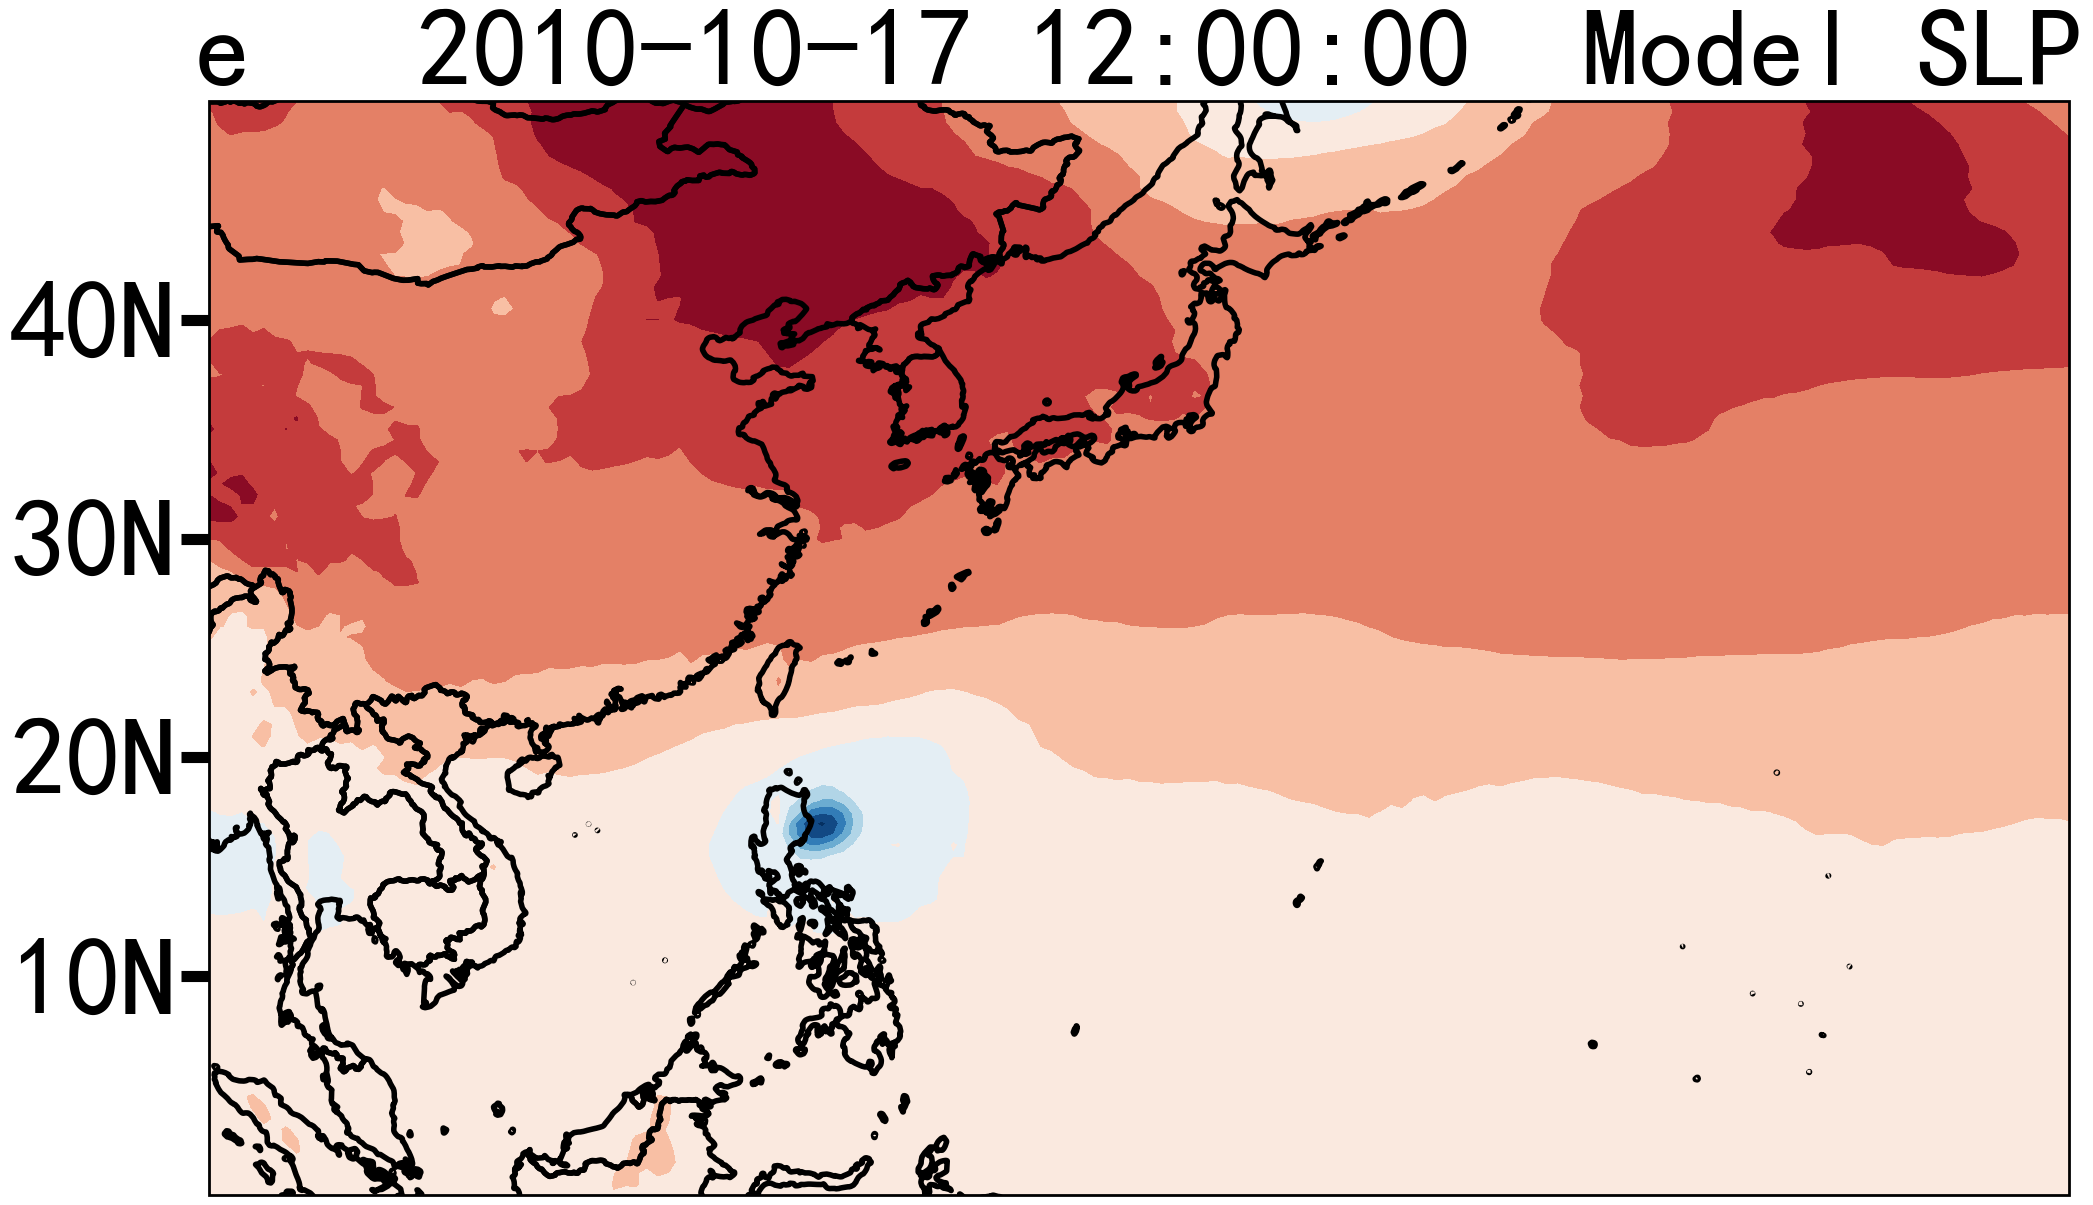

<Figure size 640x480 with 0 Axes>

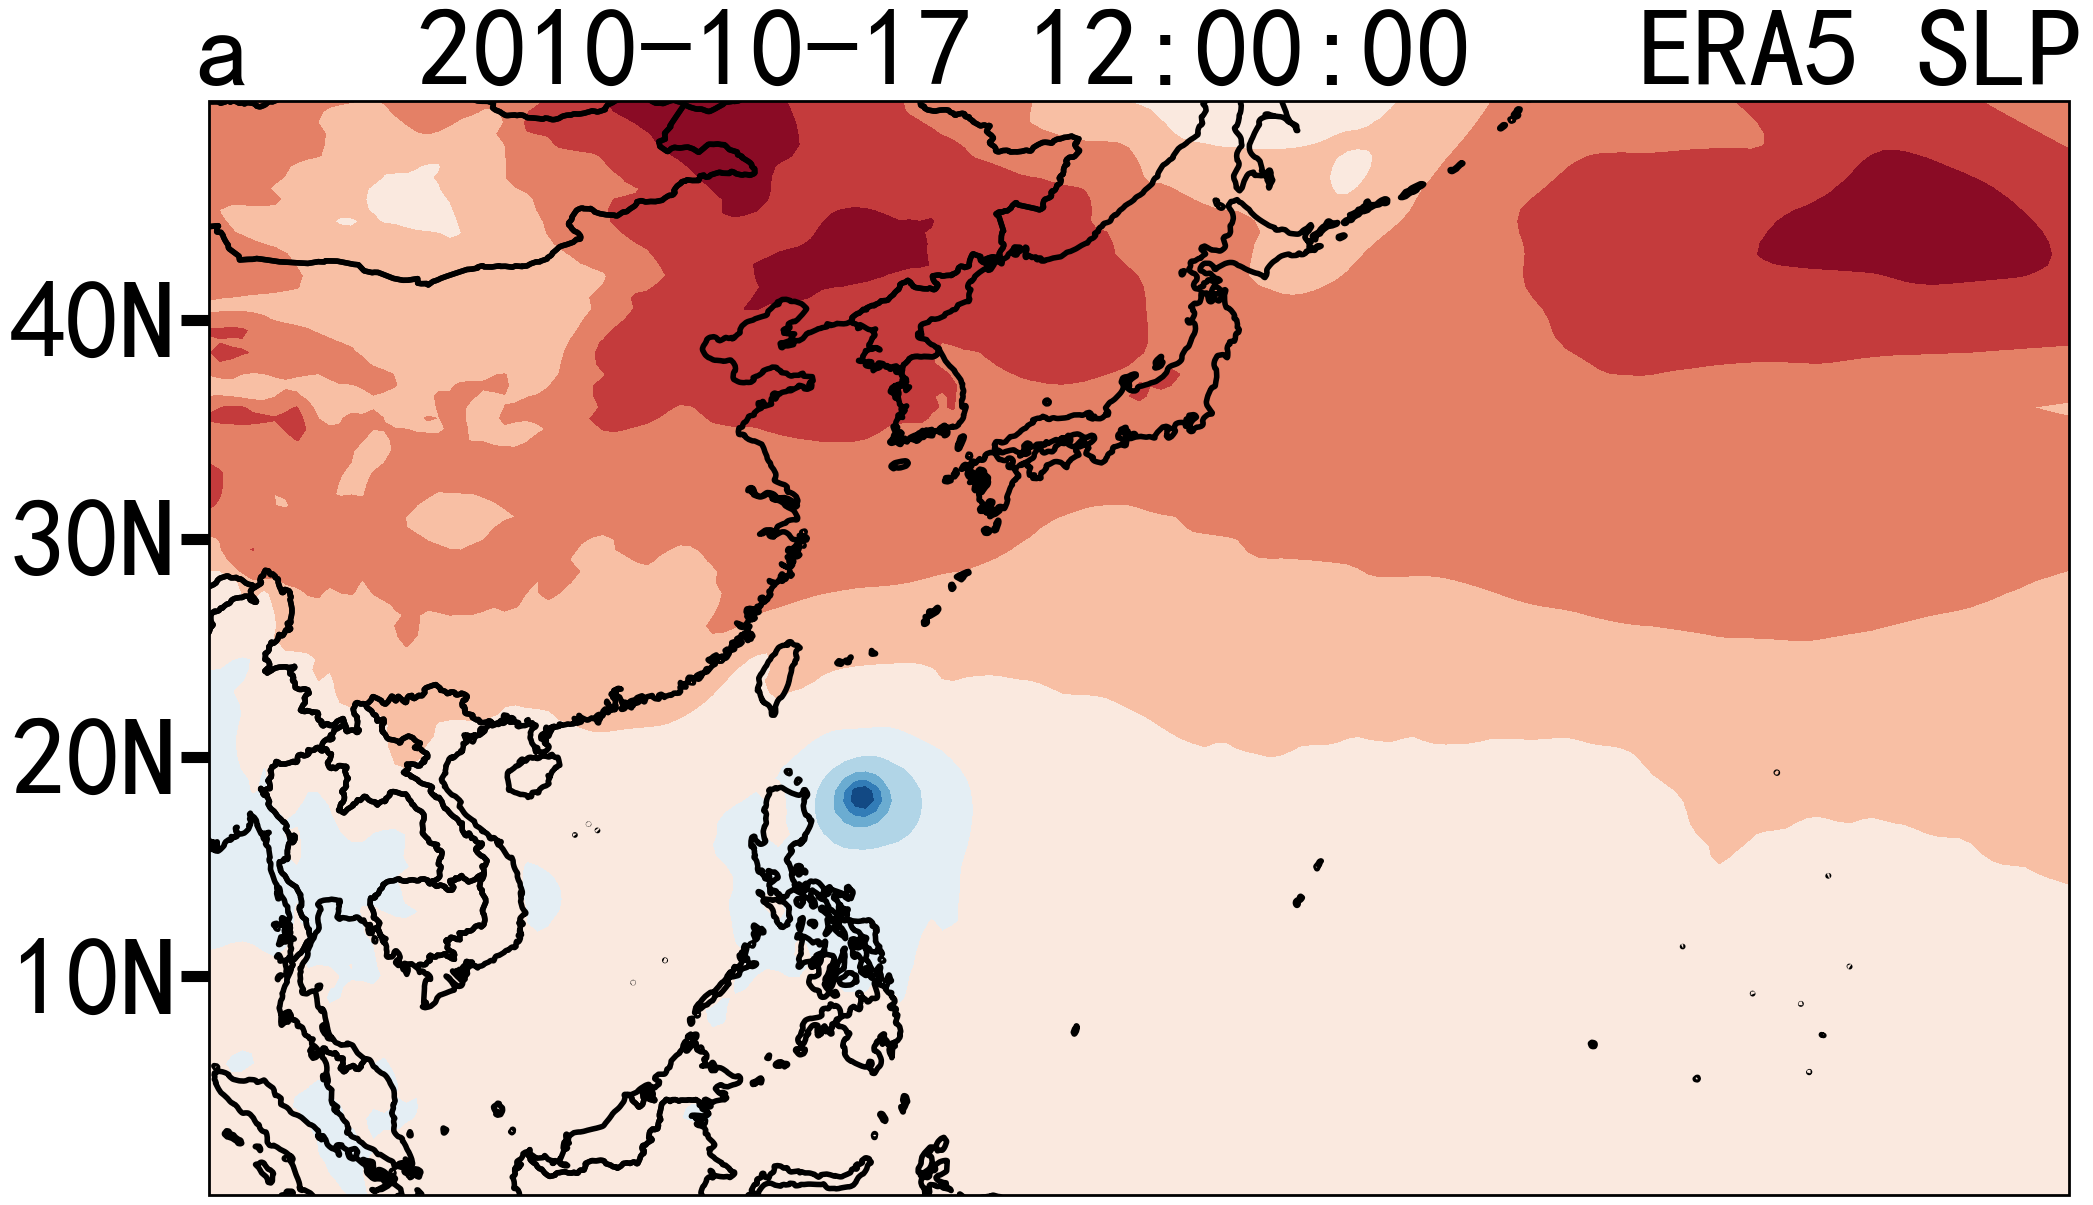

<Figure size 640x480 with 0 Axes>

In [80]:
Autoshaded_quiver(np.array(slp_model[16,:-1,:-1]),None,None,None,lon2[:-1],lat2[:-1],None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='e   2010-10-17 12:00:00  Model SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='yes',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)
Autoshaded_quiver(np.array(slp_ave[16,:,:]),None,None,None,lon1,lat1,None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='a   2010-10-17 12:00:00   ERA5 SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='yes',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)

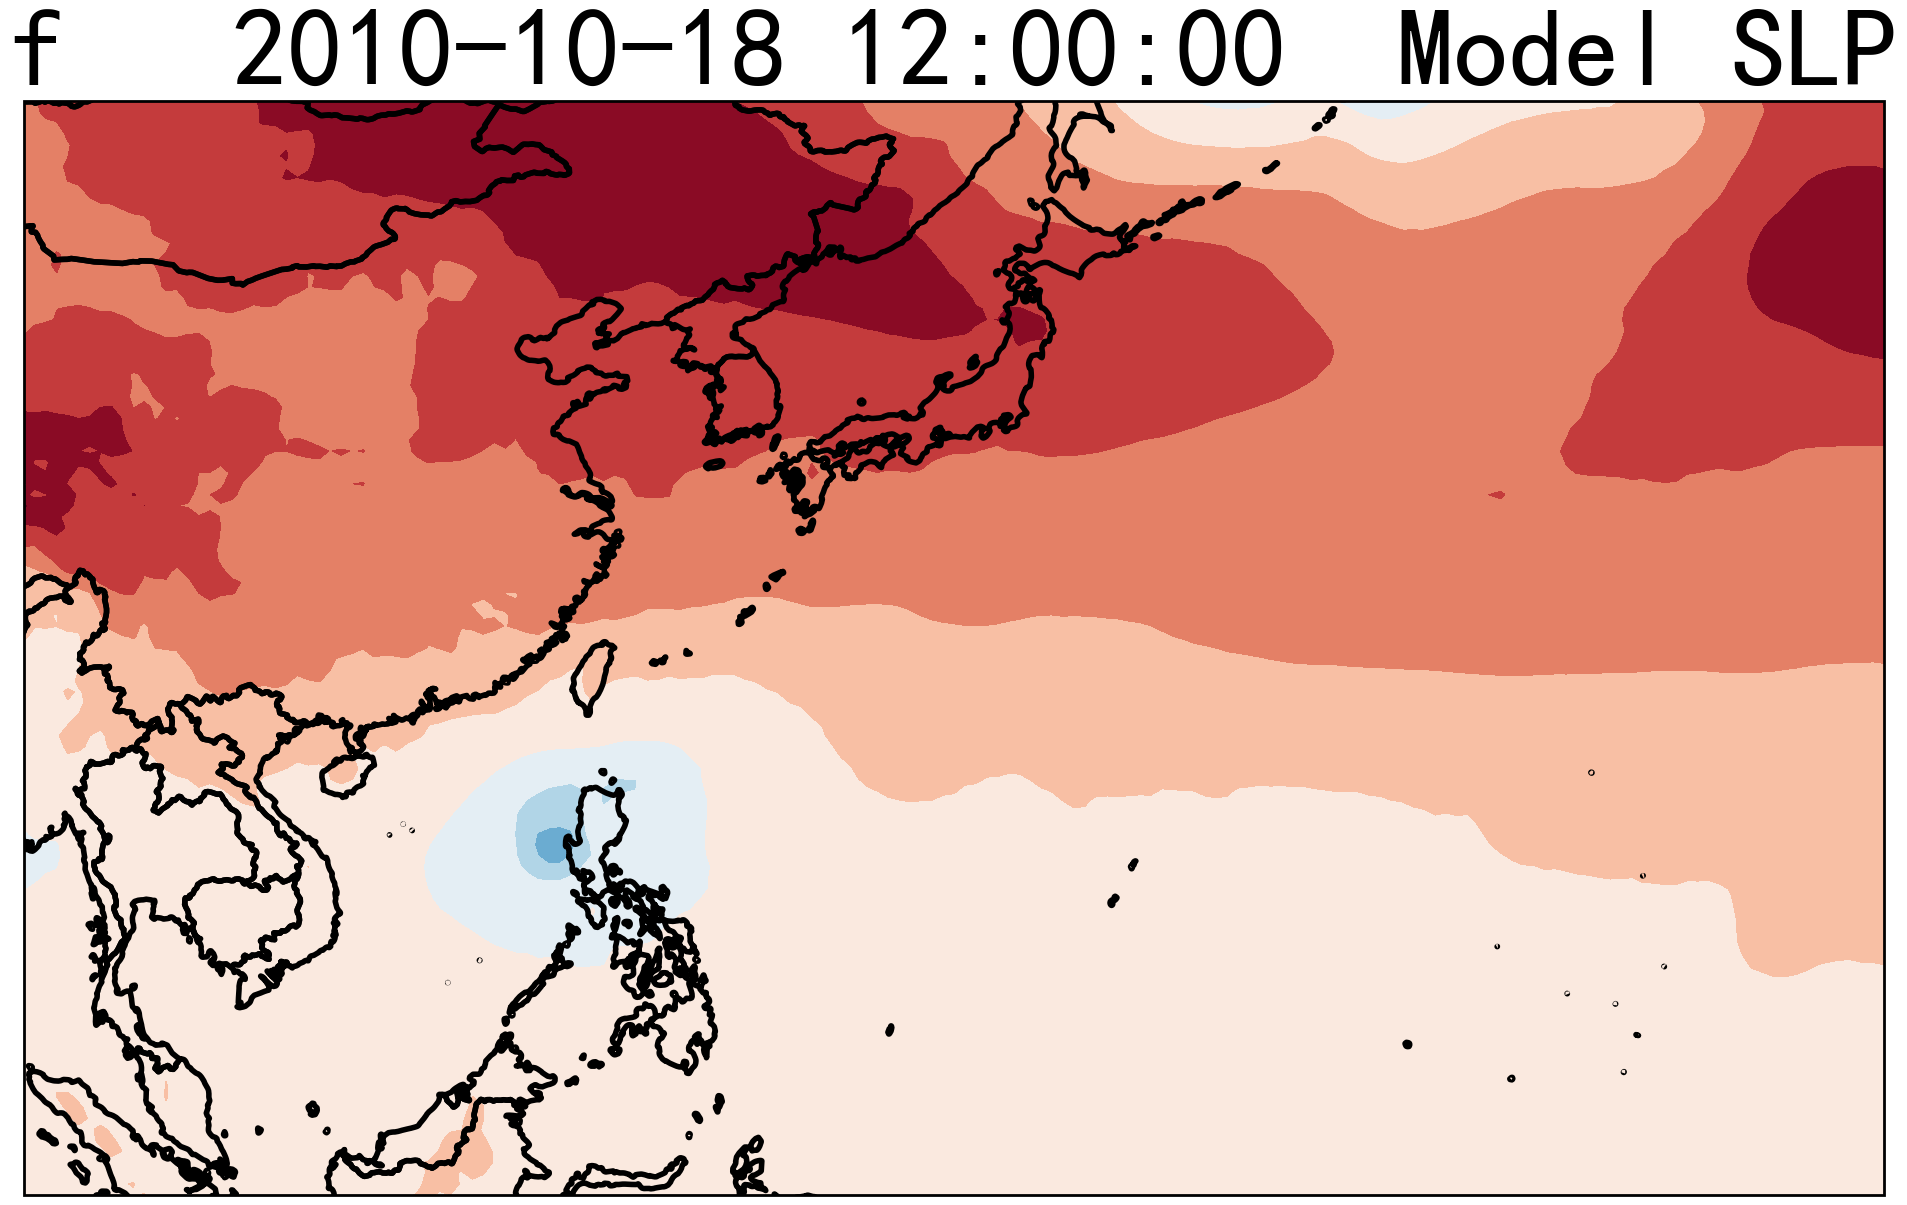

<Figure size 640x480 with 0 Axes>

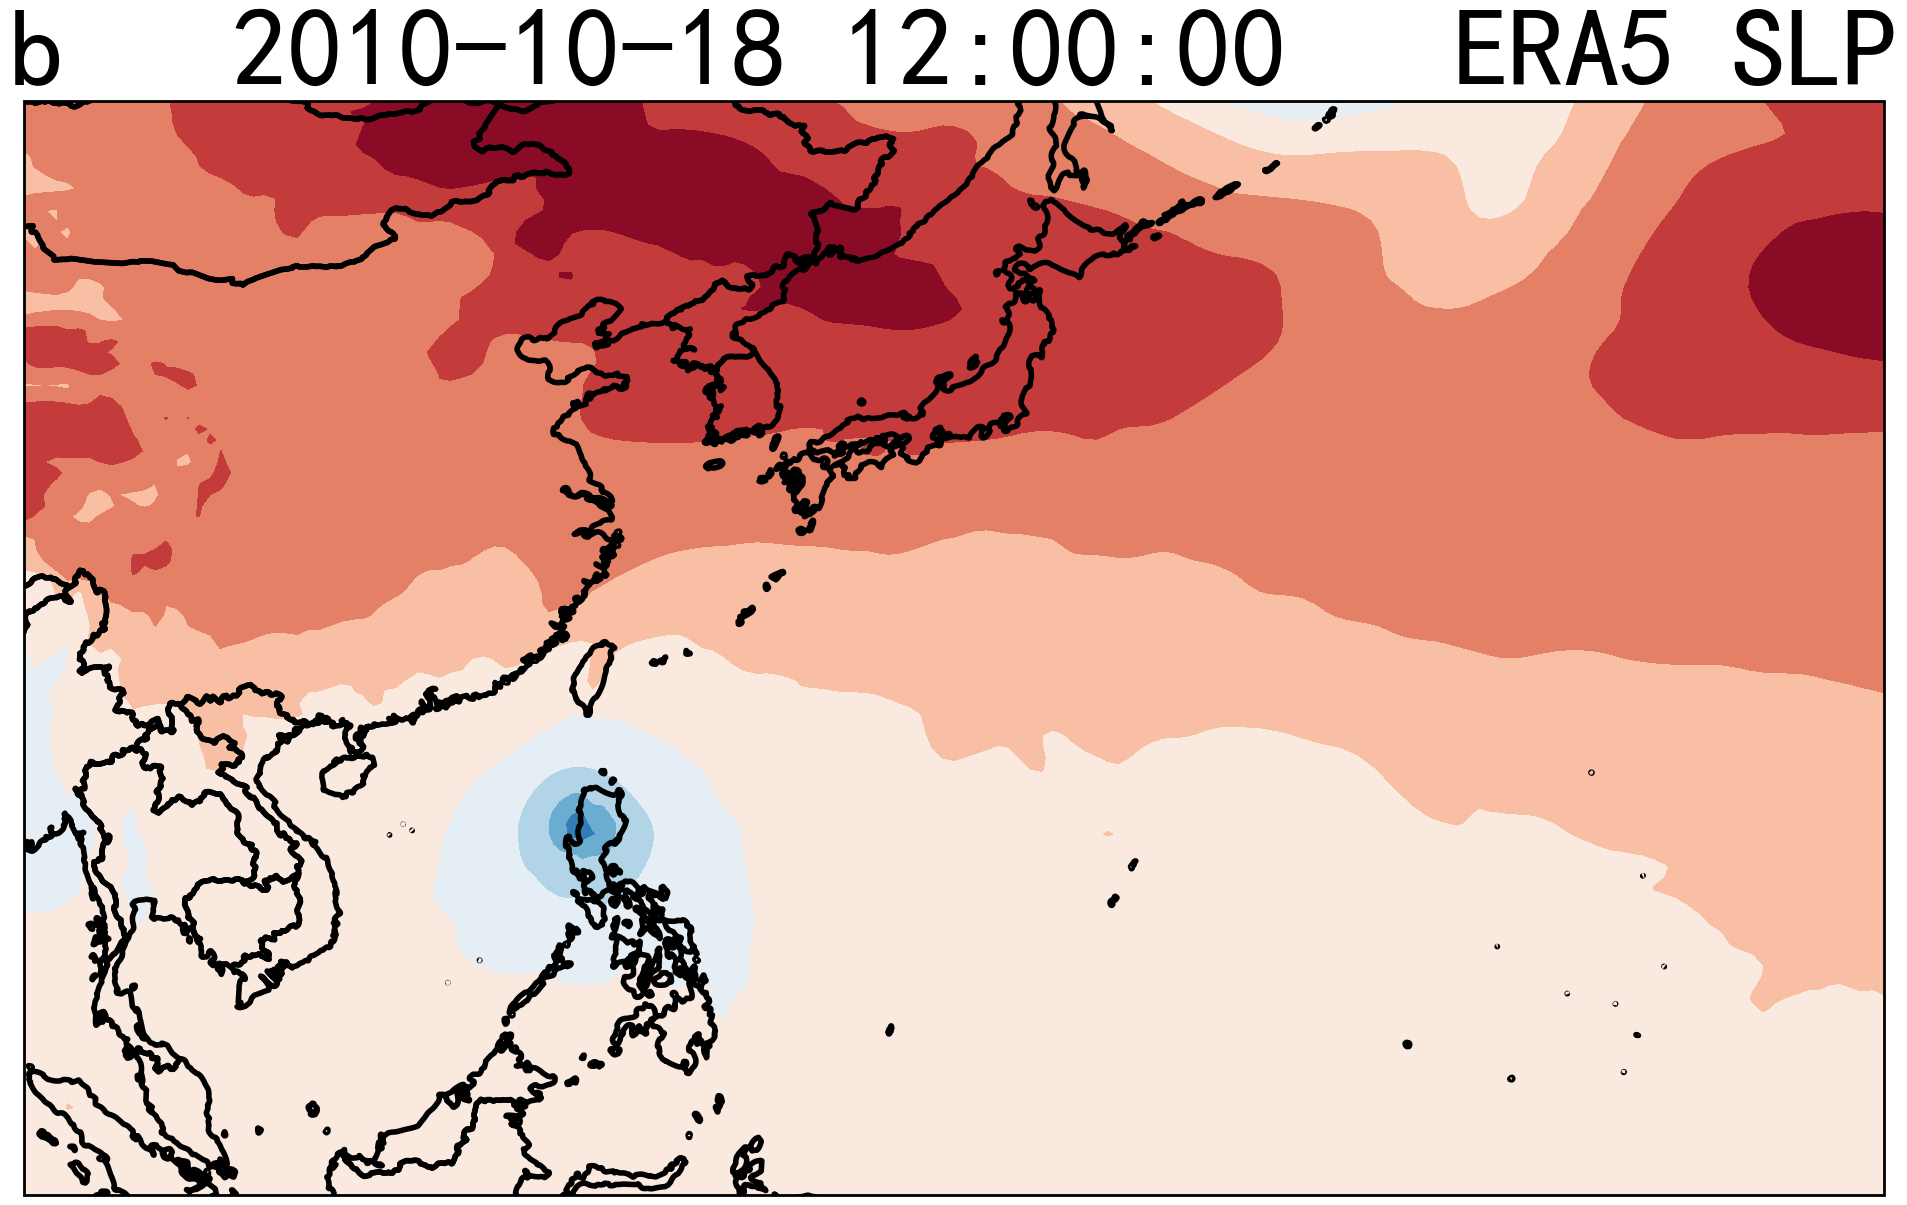

<Figure size 640x480 with 0 Axes>

In [83]:
Autoshaded_quiver(np.array(slp_model[20,:-1,:-1]),None,None,None,lon2[:-1],lat2[:-1],None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='f   2010-10-18 12:00:00  Model SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='no',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)
Autoshaded_quiver(np.array(slp_ave[20,:,:]),None,None,None,lon1,lat1,None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='b   2010-10-18 12:00:00   ERA5 SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='no',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='yes',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)

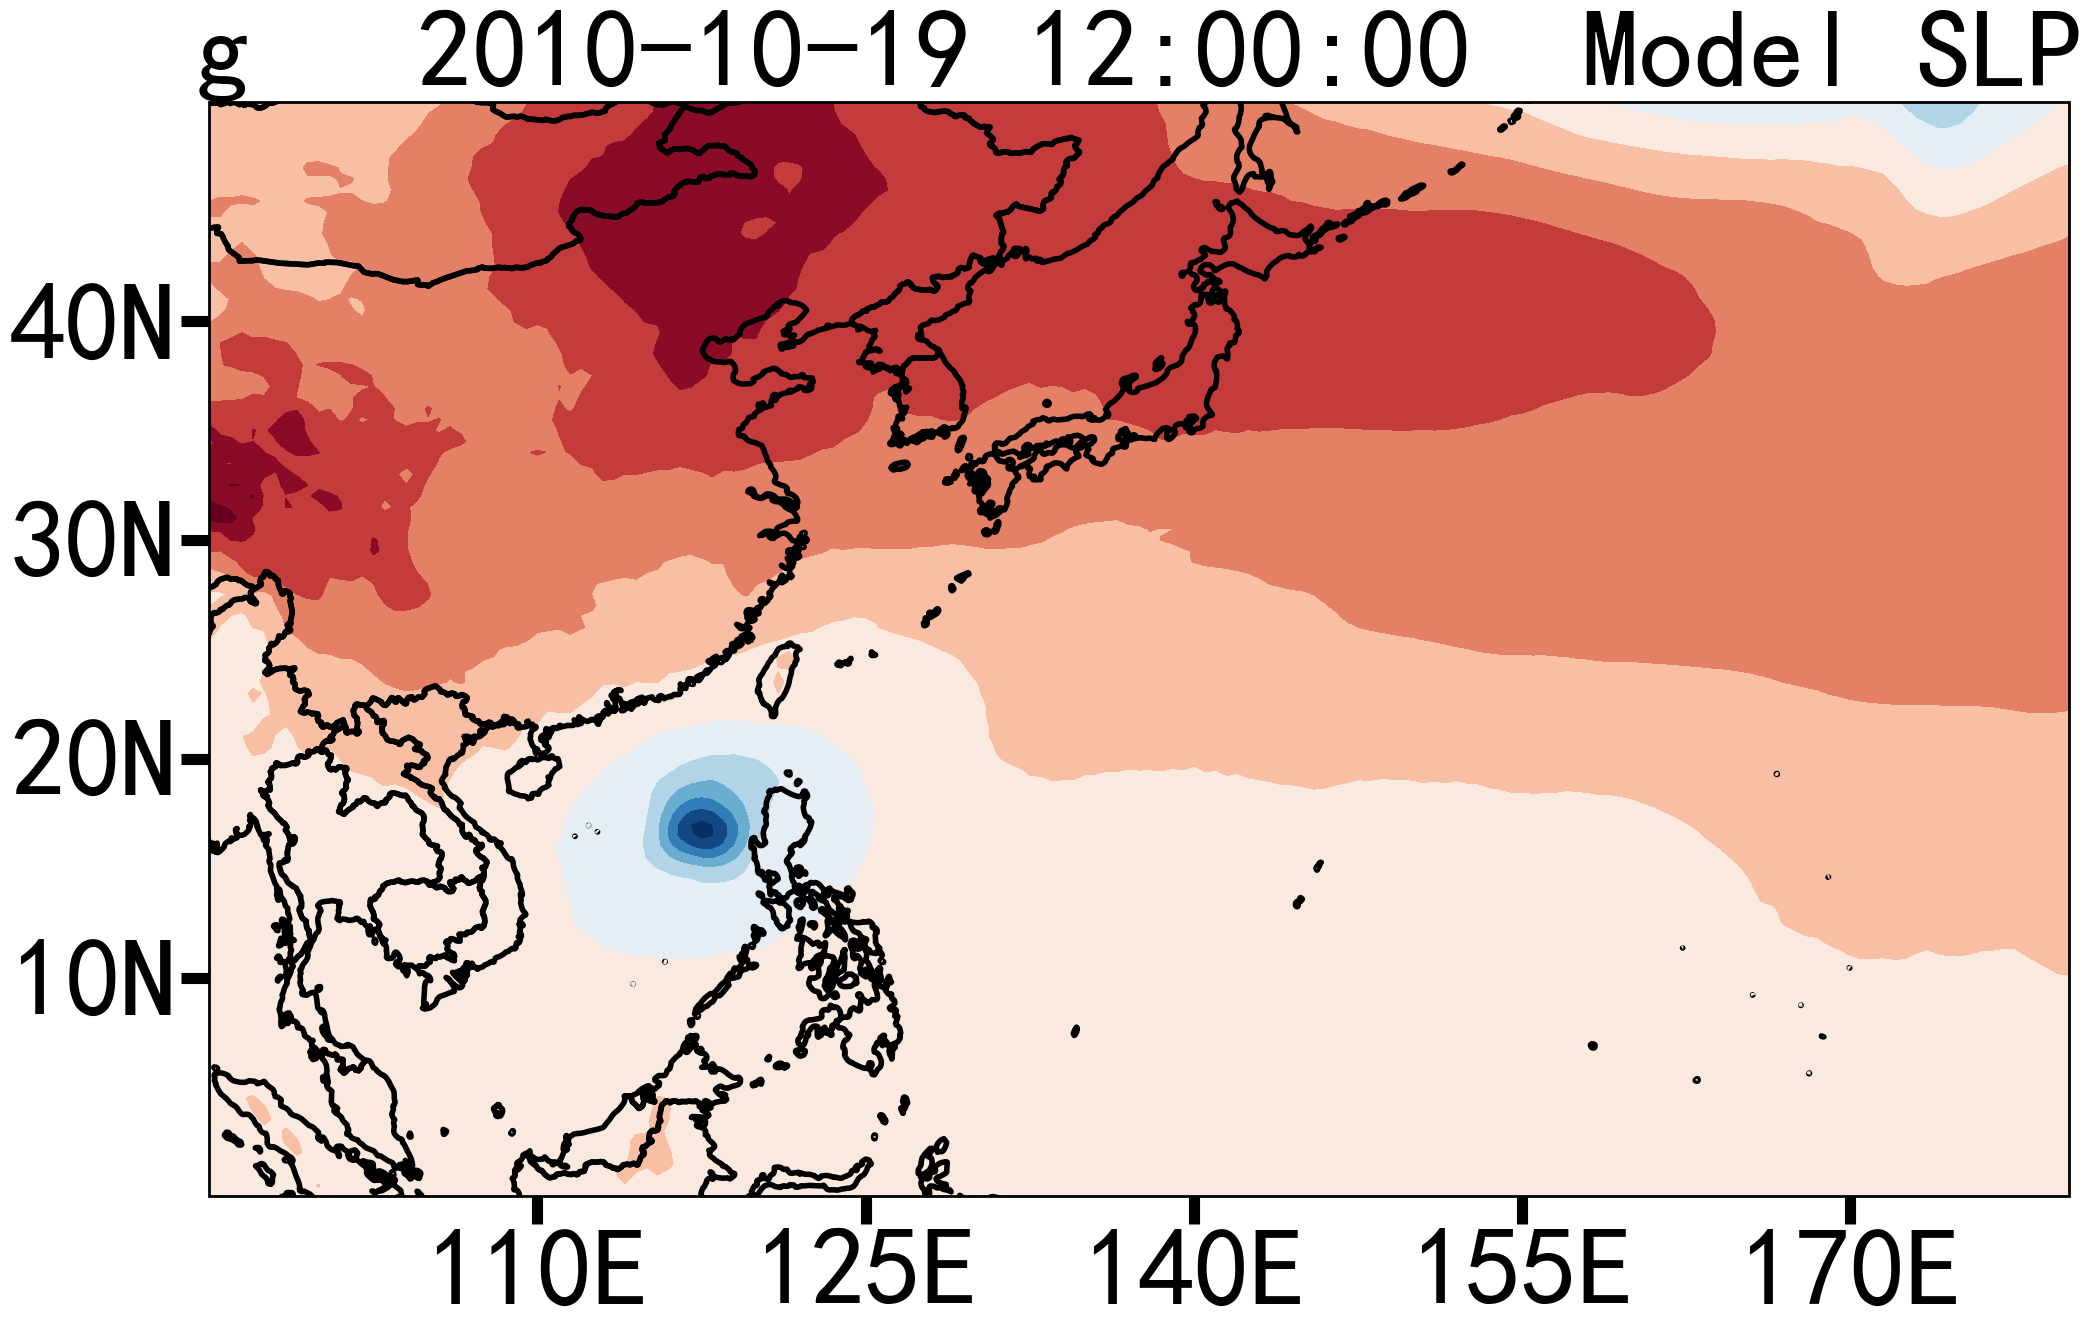

<Figure size 640x480 with 0 Axes>

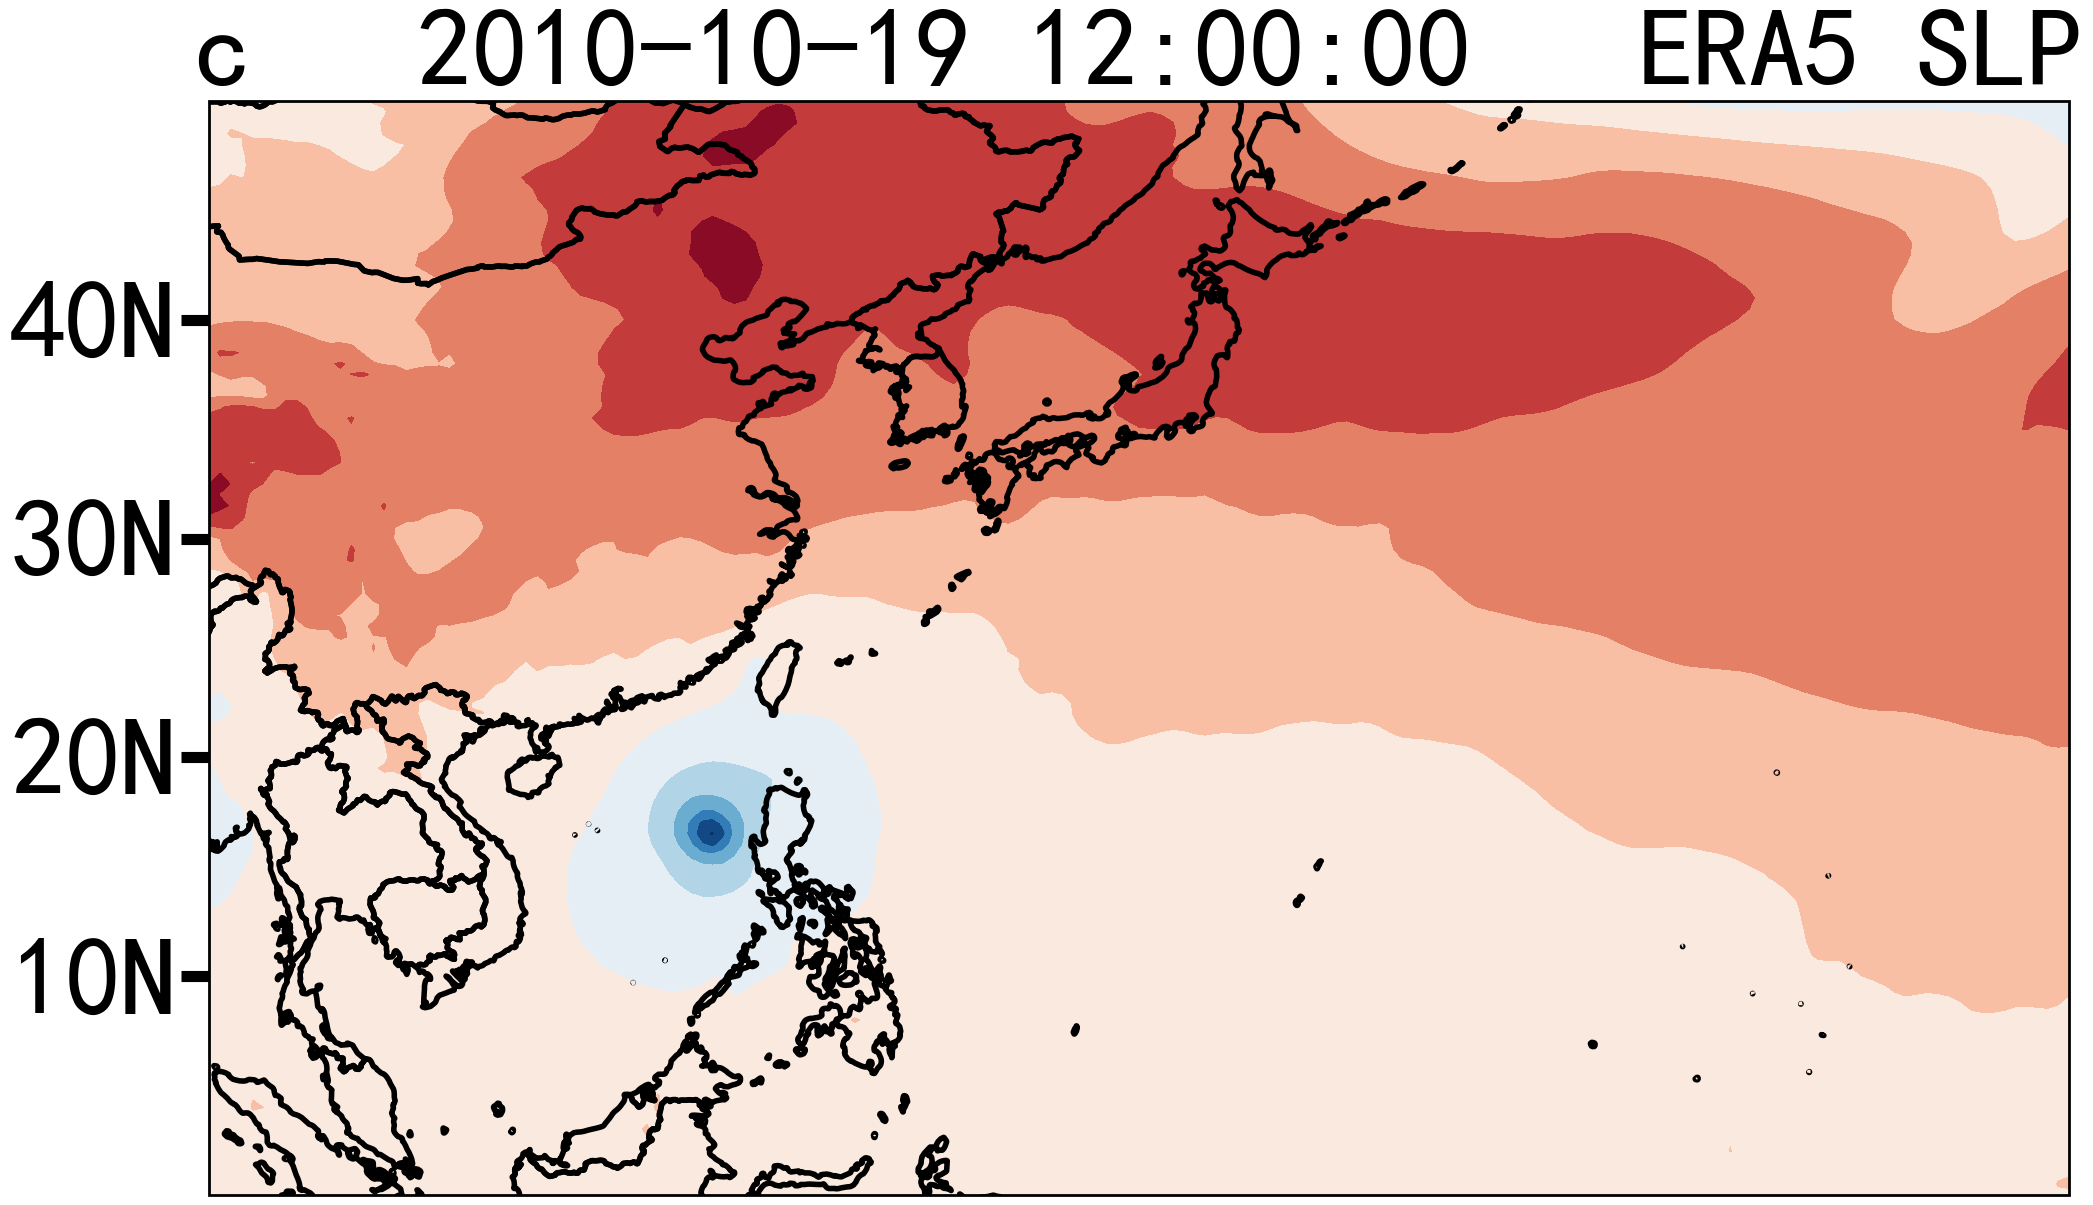

<Figure size 640x480 with 0 Axes>

In [82]:
Autoshaded_quiver(np.array(slp_model[24,:-1,:-1]),None,None,None,lon2[:-1],lat2[:-1],None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='g   2010-10-19 12:00:00  Model SLP',ifline='no',ifclabel='no',ifxaxis='yes',ifyaxis='yes',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)
Autoshaded_quiver(np.array(slp_ave[24,:,:]),None,None,None,lon1,lat1,None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='c   2010-10-19 12:00:00   ERA5 SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='yes',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)

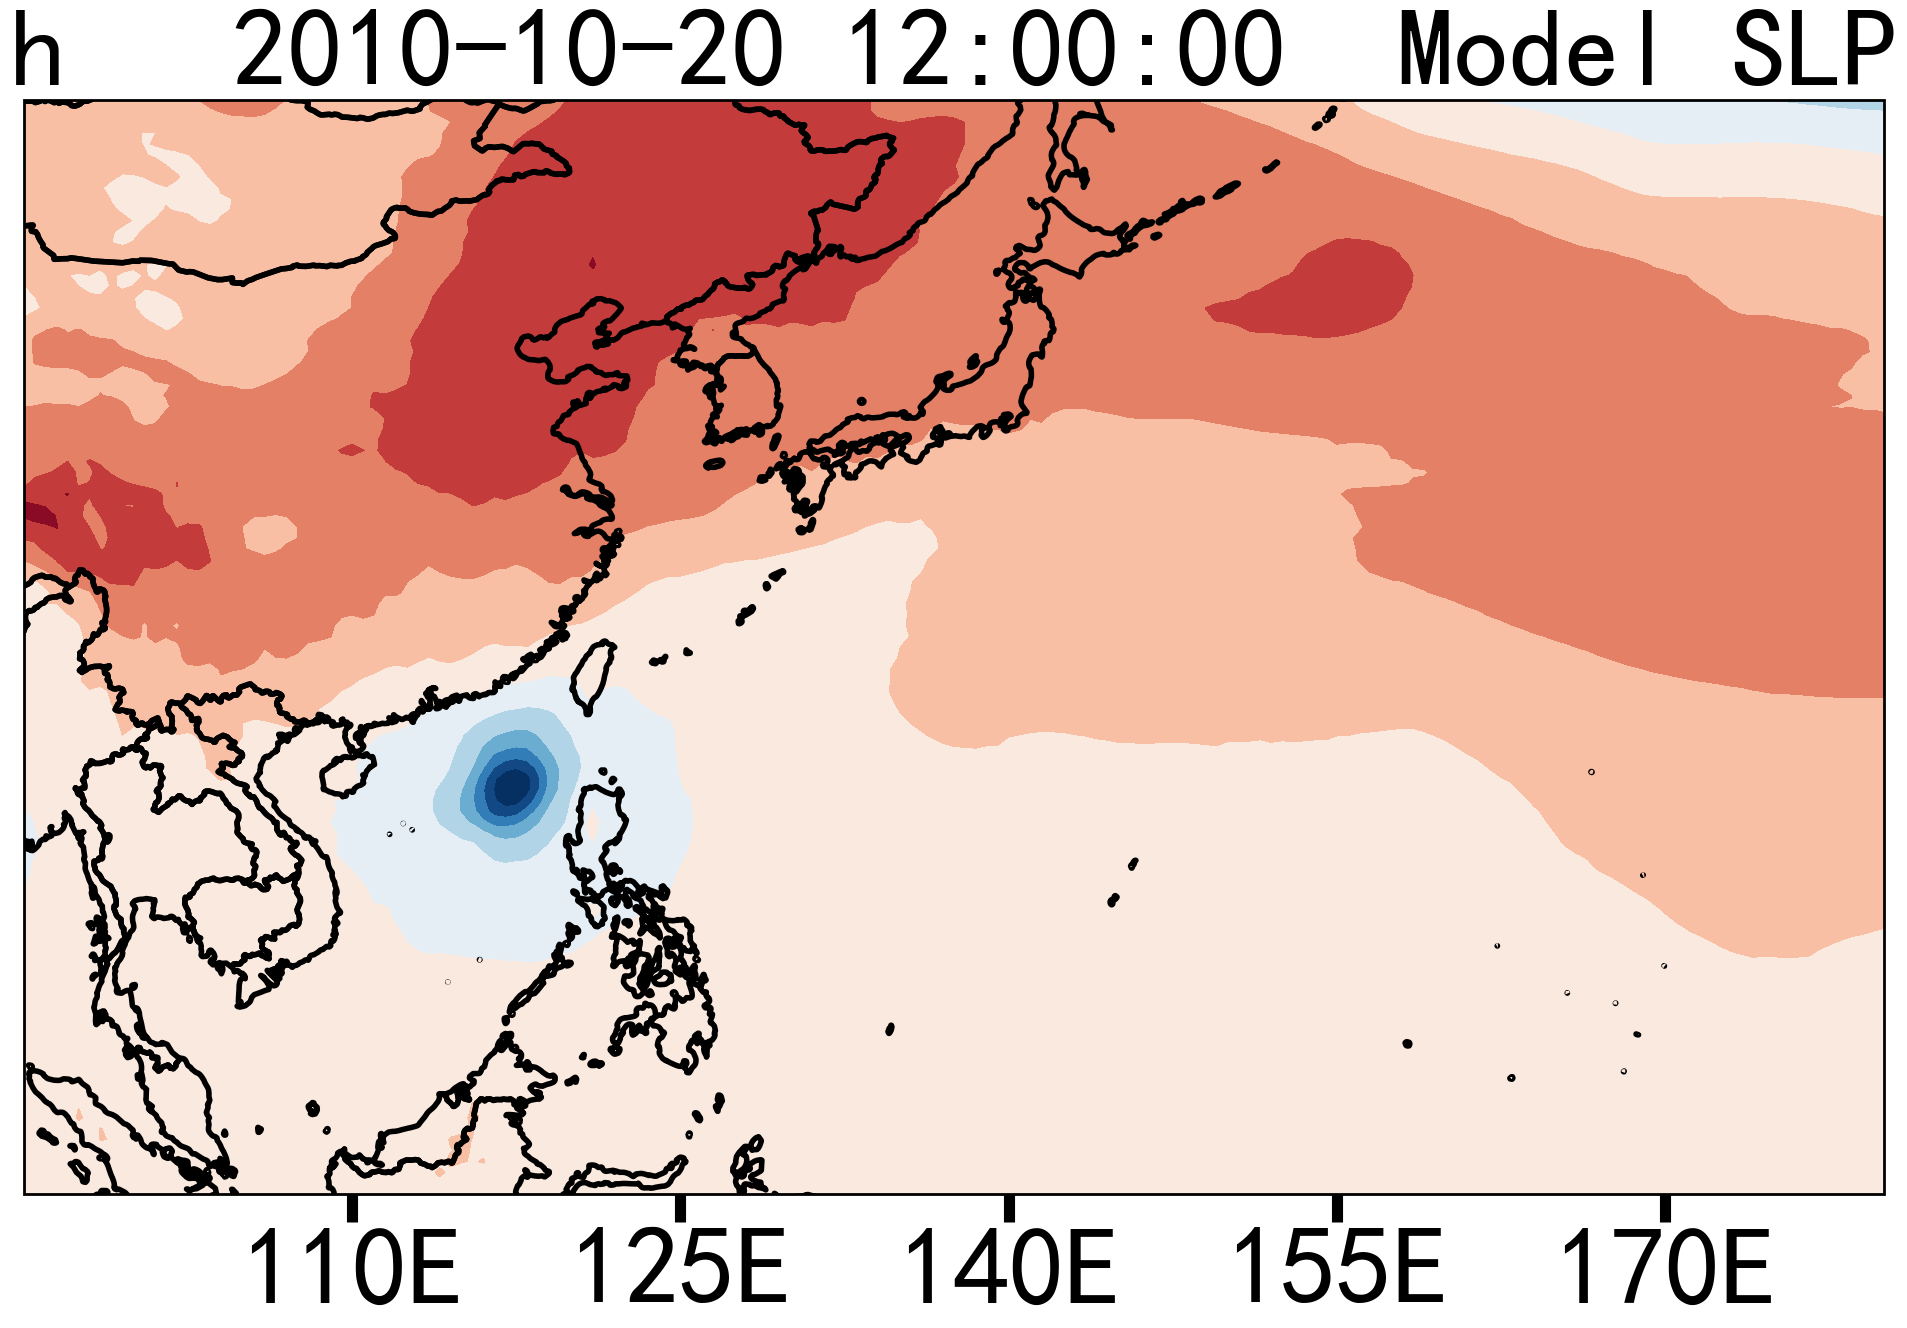

<Figure size 640x480 with 0 Axes>

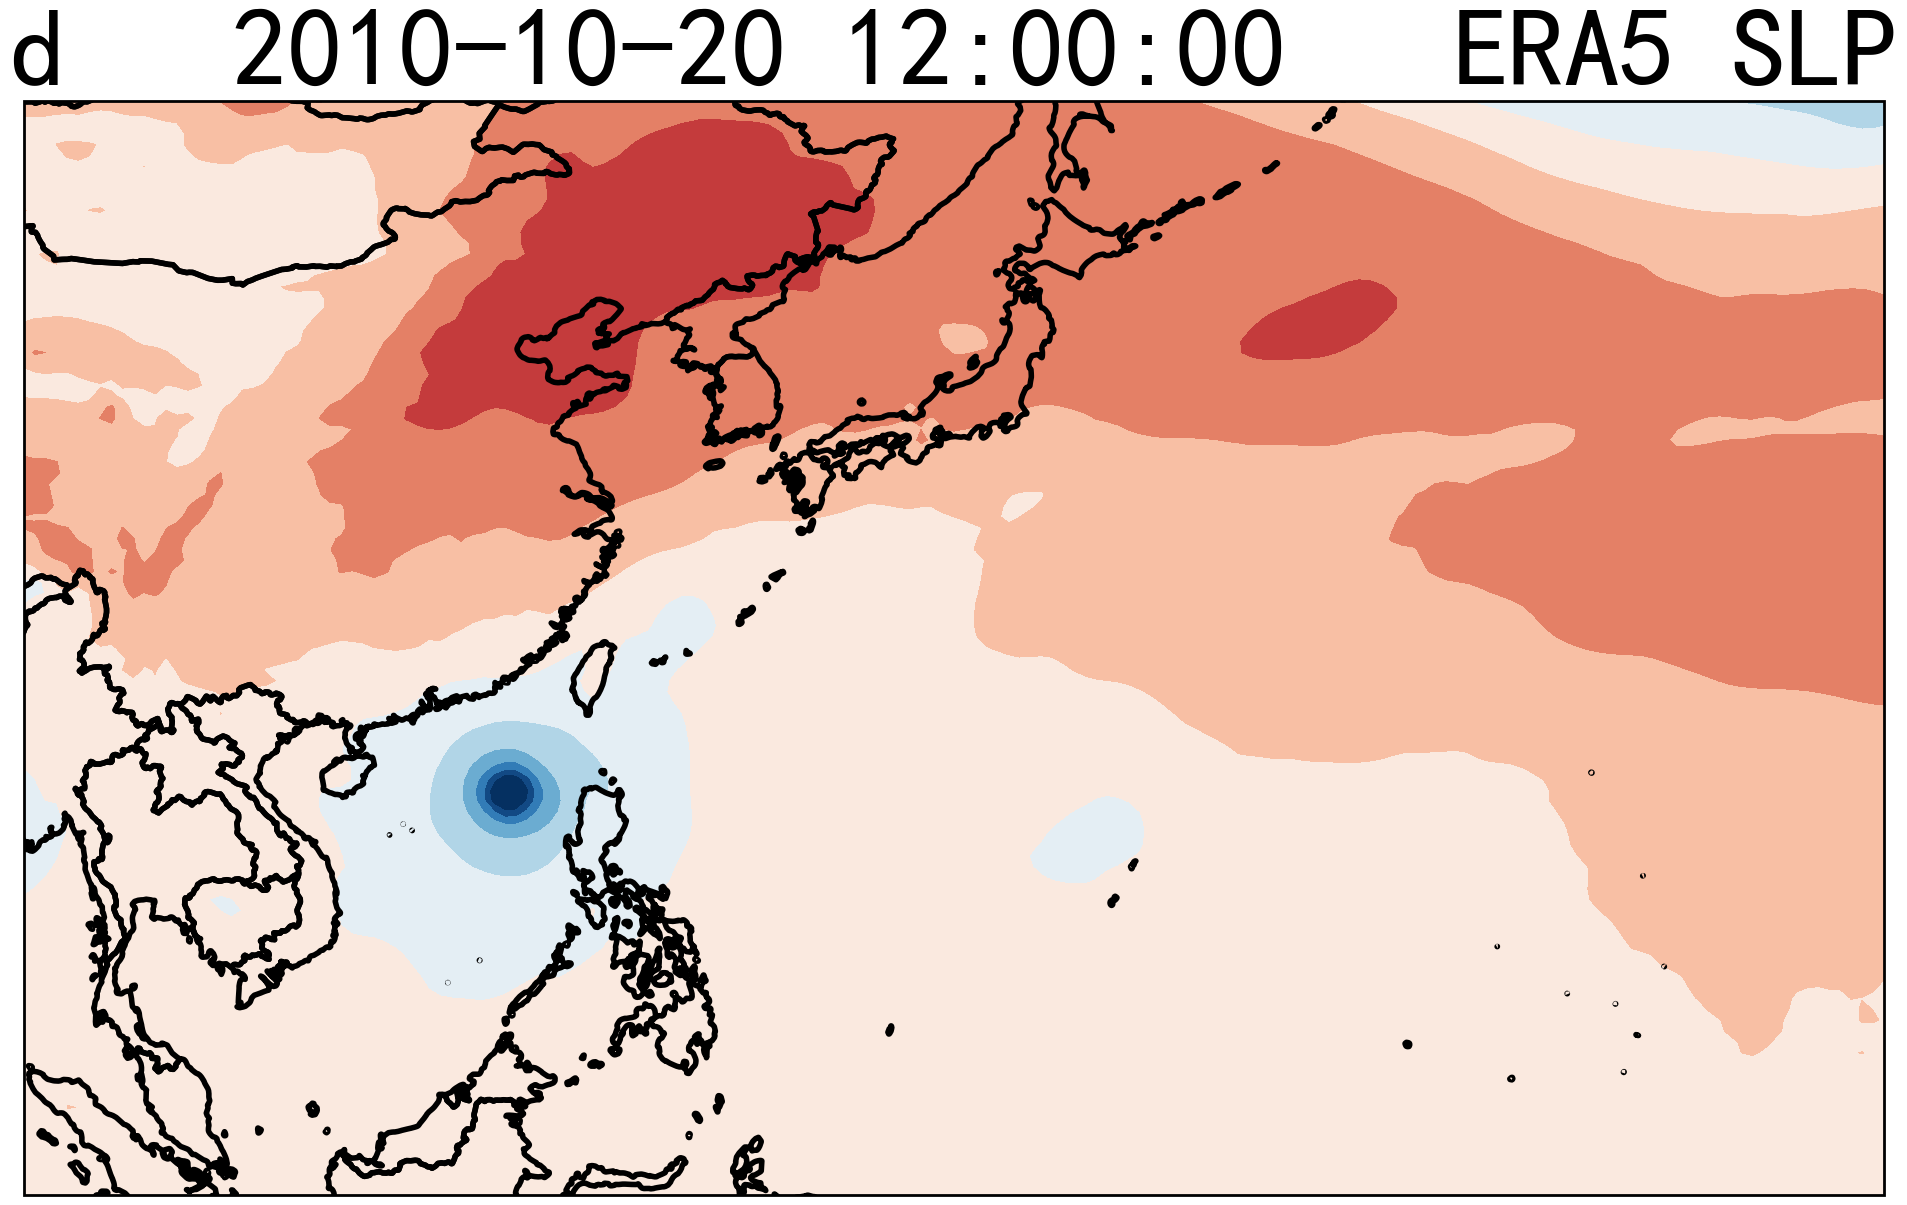

<Figure size 640x480 with 0 Axes>

In [75]:
Autoshaded_quiver(np.array(slp_model[28,:-1,:-1]),None,None,None,lon2[:-1],lat2[:-1],None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='h   2010-10-20 12:00:00  Model SLP',ifline='no',ifclabel='no',ifxaxis='yes',ifyaxis='no',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)
Autoshaded_quiver(np.array(slp_ave[28,:,:]),None,None,None,lon1,lat1,None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='d   2010-10-20 12:00:00   ERA5 SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='no',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)

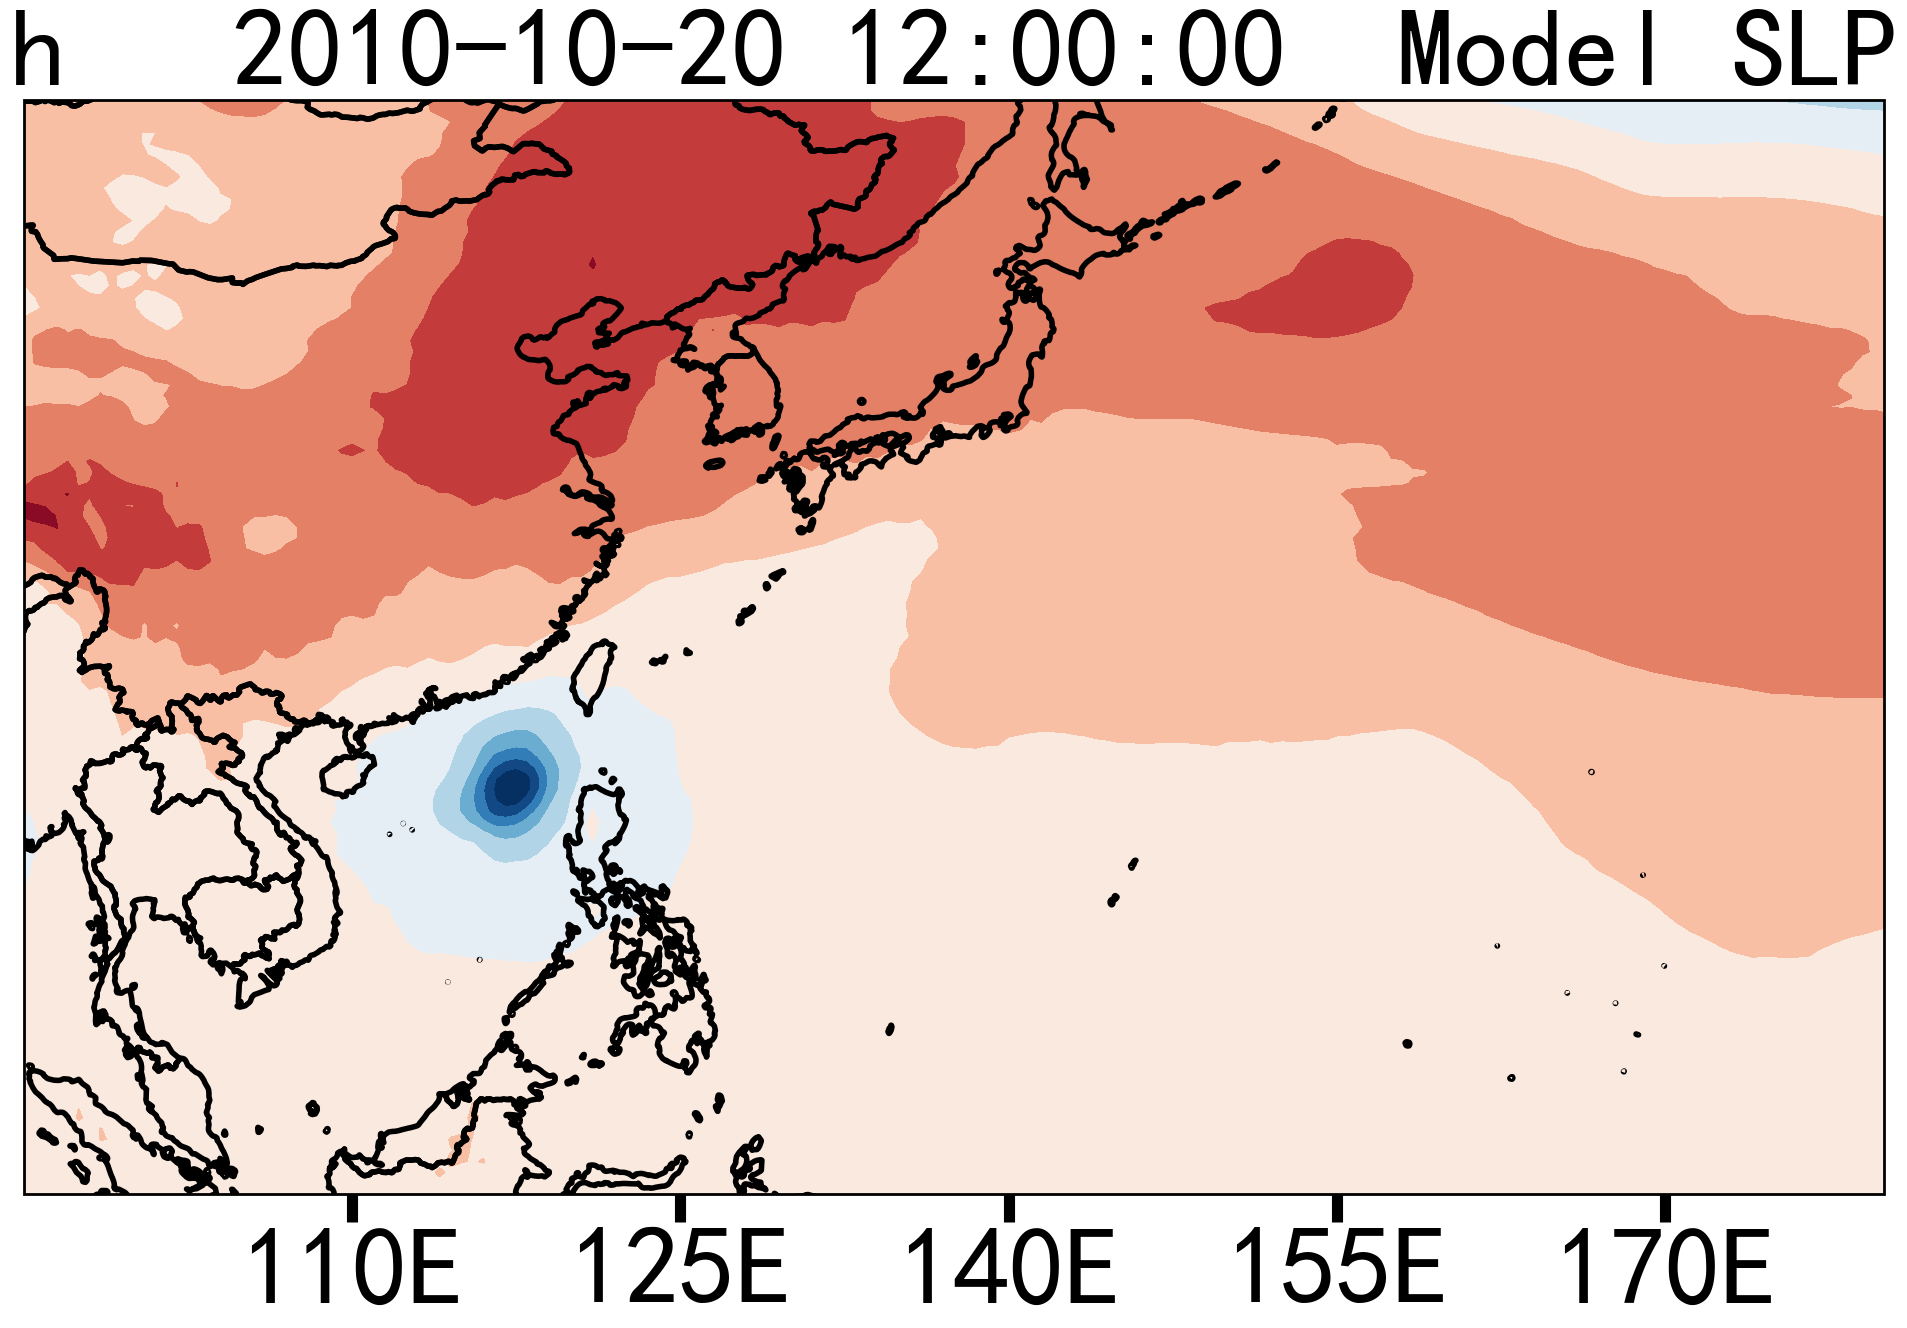

<Figure size 640x480 with 0 Axes>

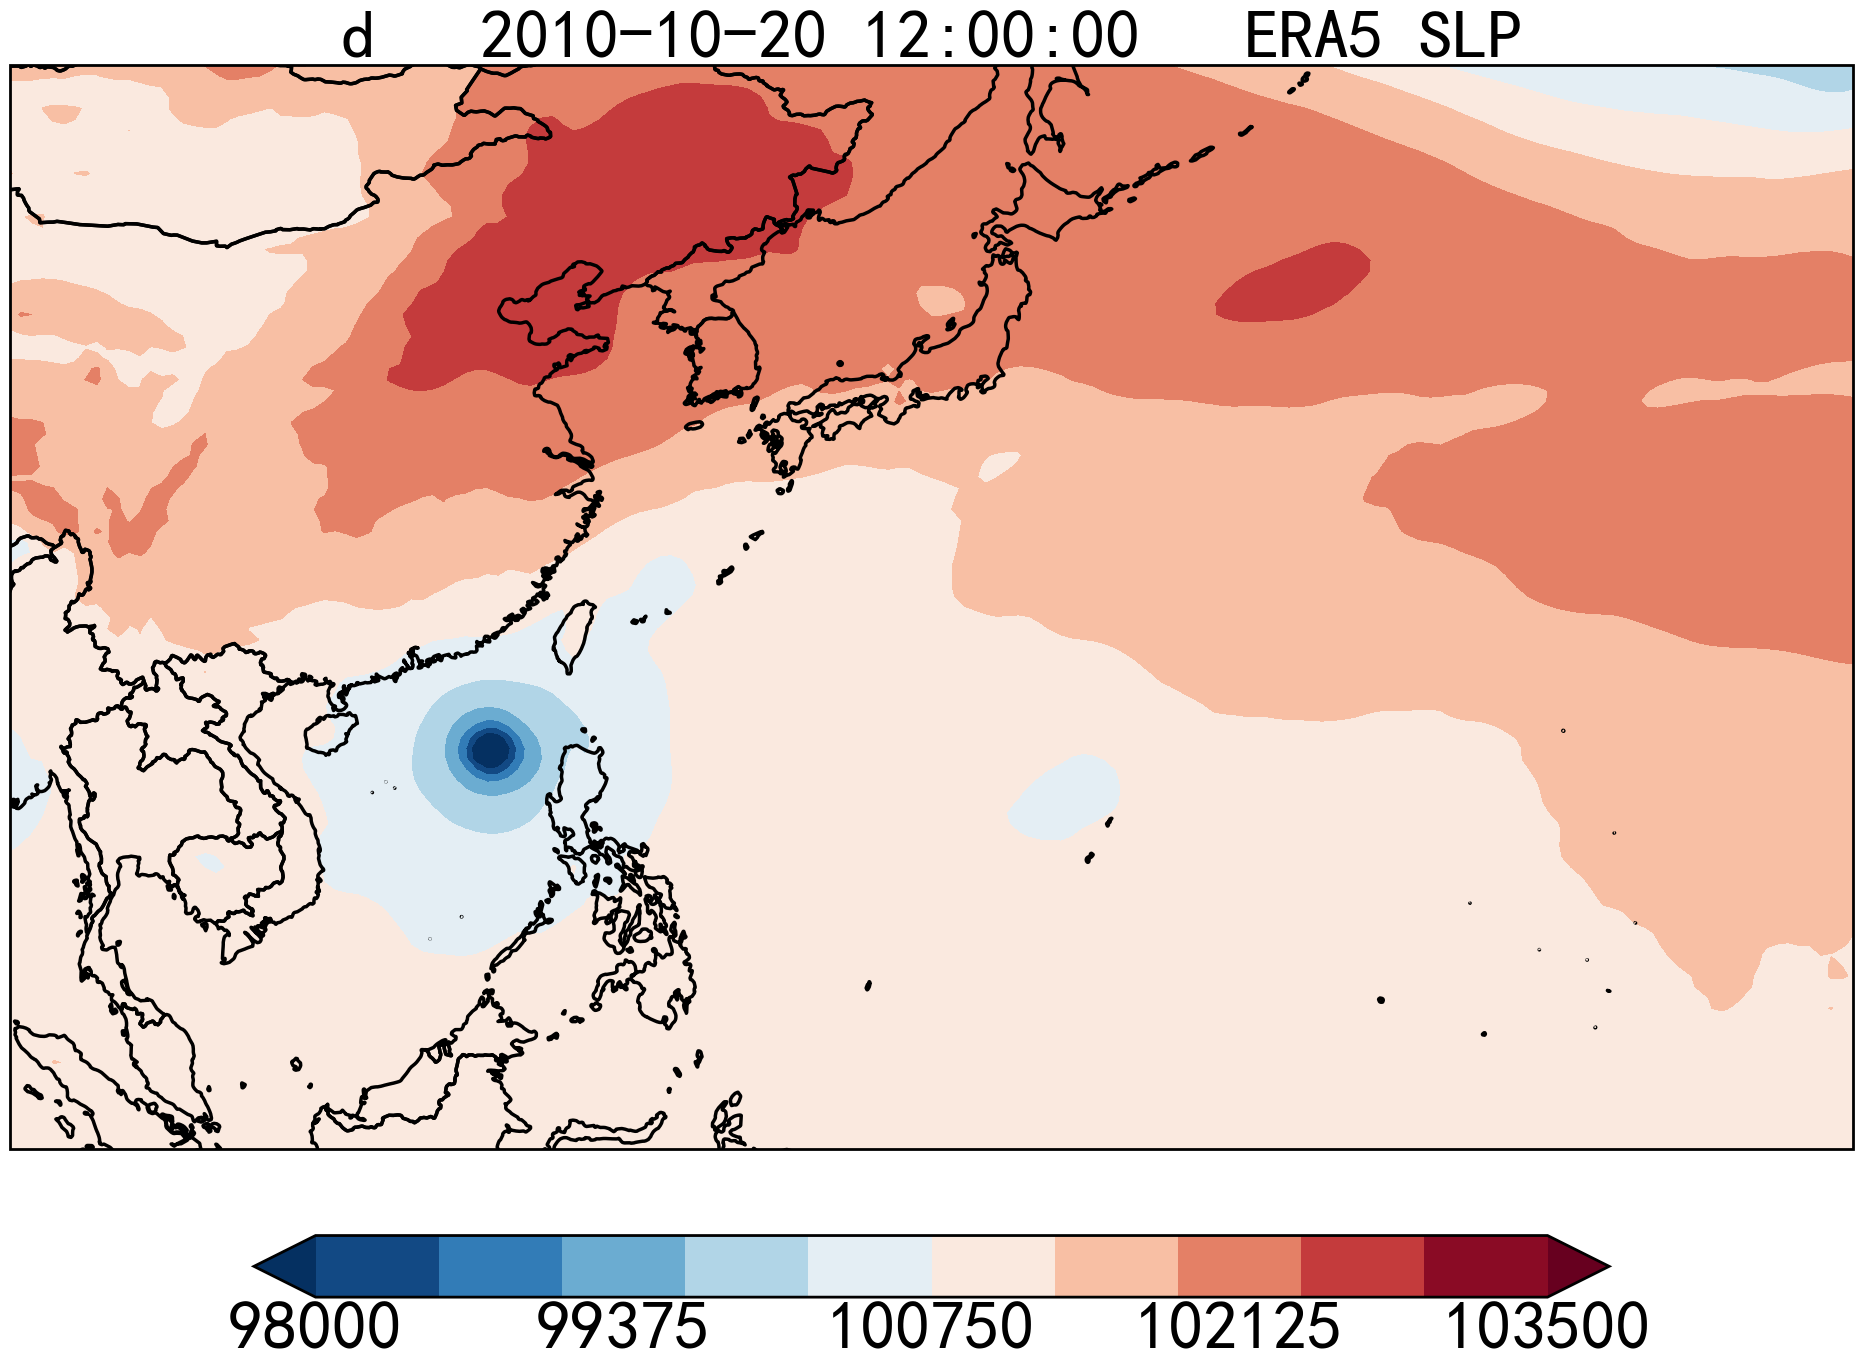

<Figure size 640x480 with 0 Axes>

In [76]:
Autoshaded_quiver(np.array(slp_model[28,:-1,:-1]),None,None,None,lon2[:-1],lat2[:-1],None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='h   2010-10-20 12:00:00  Model SLP',ifline='no',ifclabel='no',ifxaxis='yes',ifyaxis='no',ifcolorbar='no',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=80,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)
Autoshaded_quiver(np.array(slp_ave[28,:,:]),None,None,None,lon1,lat1,None,None,0,50,95,180,'shaded','xy',picturenum=1,row=1,column=1,dpi=600,shadedcolor='RdBu_r',ifshp='yes',shpname='F:/map/country1.shp',ifsave='no',savename=None,valuemodel='+',ifself_vmax_vmin='both',selfvmax =103500,selfvmin=98000,shaded_quiver_title='d   2010-10-20 12:00:00   ERA5 SLP',ifline='no',ifclabel='no',ifxaxis='no',ifyaxis='no',ifcolorbar='yes',ifhatch='no',hatchpoint=None,hatchvalue=None,quiverscale=1,quiverkey=1,xspace=15,yspace=10,zspace=10000,labelsize=50,section=10.0,ifmaskout='no',maskoutarea=None,iftangle='no',tangle=None,ifchina='no',chinamap=None,ifsouthseamap='no',southseamap=None,southsealoc=[0.8, 0.21, 0.1, 0.15],ifglobal='no',projection_mode='plate',ifgridline='no',ifgeo='no',geo=None)